In [1]:
from pydub import AudioSegment

audio = AudioSegment.from_file("1.m4a")

three_ms = 3

audio_segment = audio[:three_ms]

# Export the 3ms segment
audio_segment.export("output_3ms.wav", format="wav")

print("Audio segment of 3 ms has been saved as 'output_3ms.wav'.")


Audio segment of 3 ms has been saved as 'output_3ms.wav'.


In [4]:
import numpy as np

In [5]:
# Example for plotting a spectrogram using this function
import audiosegment
import matplotlib.pyplot as plt
seg = audiosegment.from_file("1.m4a")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.02, overlap=0.01)
amplitudes = 10 * np.log10(amplitudes + 1e-7)


In [6]:
amplitudes

array([[-70.       , -70.       ,  -5.262353 , ...,  14.023012 ,
         15.220243 ,  10.9097595],
       [-70.       , -70.       ,  11.750127 , ...,  20.48901  ,
         21.662727 ,  20.940876 ],
       [-70.       , -70.       ,  13.00701  , ...,  18.378405 ,
         22.8938   ,  21.206694 ],
       ...,
       [-70.       , -70.       , -29.174795 , ..., -17.836504 ,
        -20.703756 , -26.519165 ],
       [-70.       , -70.       , -21.06817  , ..., -19.06029  ,
        -23.22351  , -20.557201 ],
       [-70.       , -70.       , -18.591738 , ..., -25.218544 ,
        -22.228308 , -34.030907 ]], dtype=float32)

In [10]:
amplitudes[0]

array([-70.        , -70.        ,  -5.262353  ,   8.39651   ,
         0.386316  ,  -9.28712   ,  13.350113  ,  12.966981  ,
        16.917082  ,  15.054432  ,  20.446156  ,  17.867723  ,
        20.457916  ,  15.960014  ,   8.1699    ,  21.14698   ,
        20.319841  ,  16.617506  ,  19.686634  ,  13.512992  ,
        12.397443  ,  15.934761  ,  13.346401  ,  15.304545  ,
        10.945957  ,  17.000217  ,   8.73032   ,  15.731812  ,
        21.427145  ,  11.714248  ,  15.315573  ,   0.16115493,
         8.403235  ,  15.519409  ,   2.39816   ,  13.242358  ,
        19.021872  ,  14.407372  ,  19.983196  ,  17.767601  ,
        18.64621   ,  19.081192  ,   9.885989  ,  19.056335  ,
        19.17474   ,  19.06686   ,  17.606617  ,  10.528158  ,
        16.28614   ,  23.894493  ,  24.99744   ,  22.888021  ,
        21.282349  ,  15.6550255 ,  23.307835  ,  23.969059  ,
        17.762392  ,  16.588877  ,  11.982269  ,  13.332745  ,
         9.309467  ,  13.042679  ,  12.280285  ,   7.50

C:\Users\Admin\AppData\Local\Temp\ipykernel_2652\1172637339.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
C:\Users\Admin\anaconda3\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


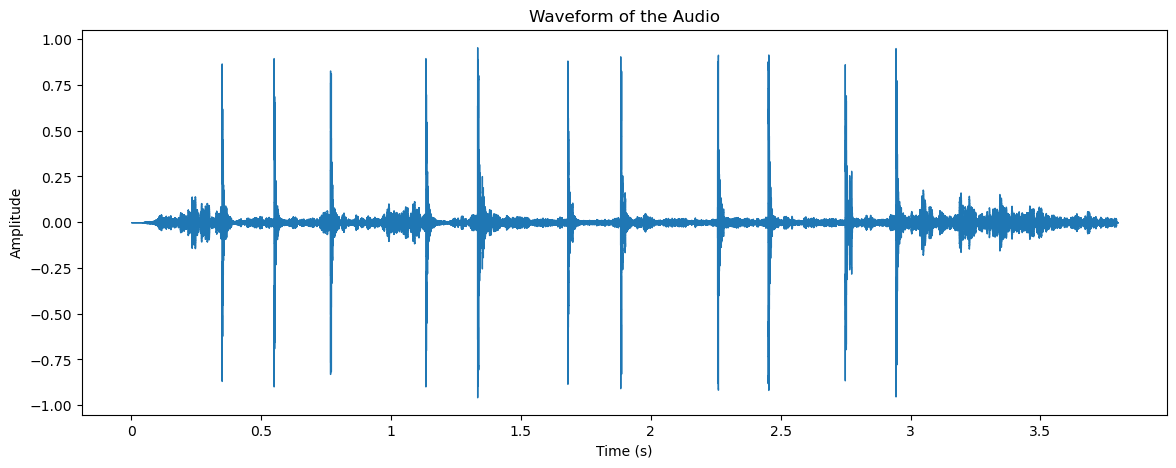

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file (replace 'your_audio_file.wav' with the actual file path)
audio_file = '1.m4a'
y, sr = librosa.load(audio_file, sr=None)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [8]:
a = y[y>0.8]
len(a)

10

C:\Users\Admin\AppData\Local\Temp\ipykernel_18024\3408313182.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
C:\Users\Admin\anaconda3\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


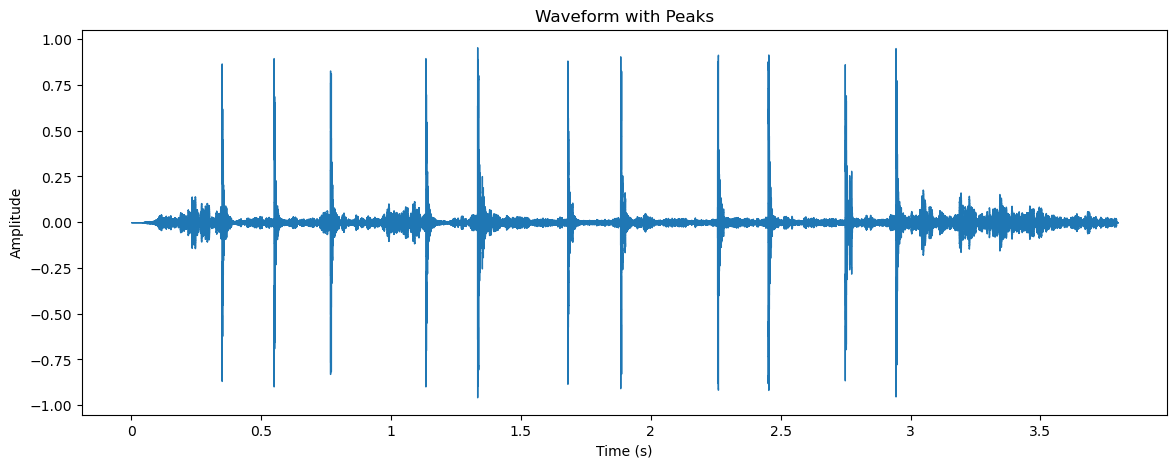

In [1]:
import librosa
import soundfile as sf  # Import soundfile for saving audio files
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq

# Load the audio file (replace with your audio file)
audio_file = '1.m4a'
y, sr = librosa.load(audio_file, sr=None)

# Find peaks in the waveform
peaks, _ = find_peaks(y, height=75,prominence=0.3)  # Adjust height for sensitivity to peaks

# Duration of the segment in seconds
segment_duration = 0.03  # 30 ms
segment_samples = int(segment_duration * sr)  # Number of samples for 0.03s

# Half the segment length (0.015s before and after the peak)
half_segment_samples = segment_samples // 2

# Extract and save segments around each peak
segments = []
for idx, peak in enumerate(peaks):
    start = max(0, peak - half_segment_samples)
    end = min(len(y), peak + half_segment_samples)
    segment = y[start:end]
    segments.append(segment)
    
    # Save the segment to a .wav file
    output_filename = f"segment_{idx+1}.wav"
    sf.write(output_filename, segment, sr)
    print(f"Saved {output_filename}")

    # Perform FFT on the segment
    N = len(segment)
    T = 1.0 / sr  # Sampling interval
    yf = fft(segment)  # FFT of the segment
    xf = fftfreq(N, T)[:N // 2]  # Frequency bins

    # Find peaks in the magnitude of the FFT
    magnitude = 2.0 / N * np.abs(yf[:N // 2])  # Magnitude spectrum
    fft_peaks, _ = find_peaks(magnitude, height=0.1)  # Adjust height threshold if needed

    # Plot the magnitude spectrum and mark the FFT peaks
    plt.figure(figsize=(10, 4))
    plt.plot(xf, magnitude)
    plt.plot(xf[fft_peaks], magnitude[fft_peaks], "x", color='r')  # Mark FFT peaks with red 'x'
    plt.title(f"FFT of Segment {idx+1}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

# Optionally, plot the waveform and mark the peaks
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.plot(peaks / sr, y[peaks], "x", color='r')  # Mark peaks with red 'x'
plt.title("Waveform with Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [73]:
y[peaks]


array([0.86727905, 0.8329773 , 0.8288574 , 0.89682007, 0.88308716,
       0.81604004, 0.8147888 , 0.8184204 , 0.9515991 ], dtype=float32)

In [58]:
peaks, _ = find_peaks(y, height=0.7785034)

SyntaxError: invalid syntax (2021161903.py, line 1)

In [55]:
max(y)

0.9515991

In [48]:
peaks/sr

array([0.34804167, 0.3483125 , 0.76541667, 1.13264583, 1.3333125 ,
       1.33510417, 1.679125  , 1.68054167, 2.2559375 , 2.4501875 ,
       2.45025   , 2.453     , 2.94172917, 2.9420625 ])

In [3]:
import os
import librosa
import soundfile as sf  # For saving audio files
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Paths
input_folder = 'Test'
output_folders = {
    'TestSample':'TestSample'
}

# Ensure output directories exist
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

# Process each .m4a file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.m4a'):
        # Extract number from the filename (e.g., 1 from '1.m4a')
        try:
            file_number = int(filename.split('.')[0])
        except ValueError:
            print(f"Skipping file with non-numeric name: {filename}")
            continue
        
        
        # Load the audio file
        audio_file = os.path.join(input_folder, filename)
        y, sr = librosa.load(audio_file, sr=None)

        # Find peaks in the waveform
        peaks, _ = find_peaks(y, height=0.75)  # Adjust height for sensitivity to peaks

        # Duration of the segment in seconds
        segment_duration = 0.3  # 30 ms
        segment_samples = int(segment_duration * sr)  # Number of samples for 0.03s
        half_segment_samples = segment_samples // 2

        # Extract and save segments around each peak
        for idx, peak in enumerate(peaks):
            start = max(0, peak - half_segment_samples)
            end = min(len(y), peak + half_segment_samples)
            segment = y[start:end]
            
            # Save the segment to the appropriate folder
            output_filename = f"{category}/segment_{file_number}_{idx+1}.wav"
            sf.write(output_filename, segment, sr)
            print(f"Saved {output_filename} to {category}")

        # Optionally, plot the waveform and mark the peaks
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(y, sr=sr)
        plt.plot(peaks / sr, y[peaks], "x", color='r')  # Mark peaks with red 'x'
        plt.title(f"Waveform with Peaks for {filename}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_20884\2230439342.py:31: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
C:\Users\Admin\anaconda3\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NameError: name 'category' is not defined

C:\Users\Admin\AppData\Local\Temp\ipykernel_20884\2333192741.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
C:\Users\Admin\anaconda3\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Saved segment_1.wav
Saved segment_2.wav
Saved segment_3.wav
Saved segment_4.wav
Saved segment_5.wav
Saved segment_6.wav
Saved segment_7.wav
Saved segment_8.wav
Saved segment_9.wav
Saved segment_10.wav
Saved segment_11.wav
Saved segment_12.wav
Saved segment_13.wav
Saved segment_14.wav
Saved segment_15.wav
Saved segment_16.wav
Saved segment_17.wav
Saved segment_18.wav
Saved segment_19.wav
Saved segment_20.wav
Saved segment_21.wav
Saved segment_22.wav
Saved segment_23.wav
Saved segment_24.wav
Saved segment_25.wav
Saved segment_26.wav
Saved segment_27.wav
Saved segment_28.wav
Saved segment_29.wav


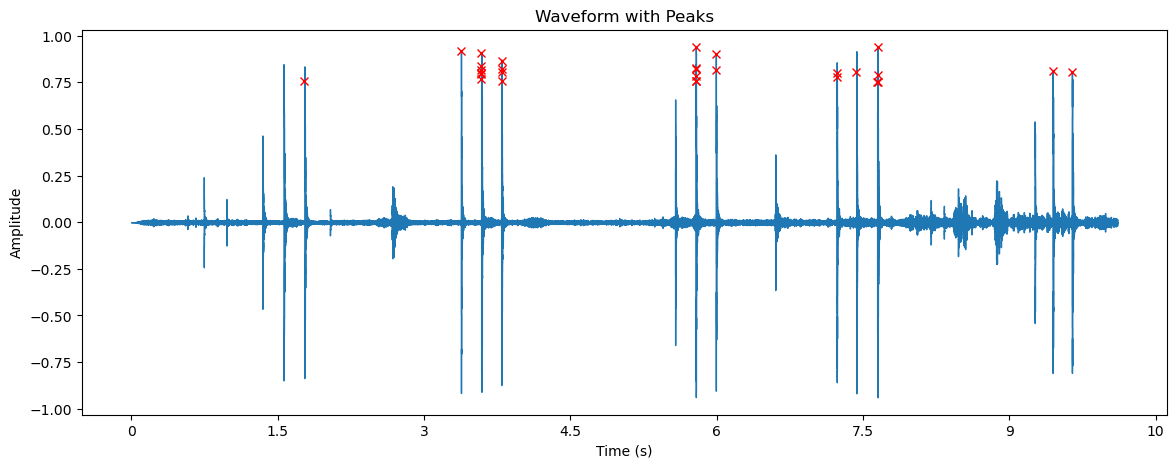

In [4]:
import librosa
import soundfile as sf  # Import soundfile for saving audio files
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the audio file (replace with your audio file)
audio_file = '31.m4a'
y, sr = librosa.load(audio_file, sr=None)

# Find peaks in the waveform
peaks, _ = find_peaks(y, height=0.75)  # Adjust height for sensitivity to peaks

# Duration of the segment in seconds
segment_duration = 0.3  # 30 ms
segment_samples = int(segment_duration * sr)  # Number of samples for 0.03s

# Half the segment length (0.015s before and after the peak)
half_segment_samples = segment_samples // 2

# Extract and save segments around each peak
segments = []
for idx, peak in enumerate(peaks):
    start = max(0, peak - half_segment_samples)
    end = min(len(y), peak + half_segment_samples)
    segment = y[start:end]
    segments.append(segment)
    
    # Save the segment to a .wav file
    output_filename = f"segment_{idx+1}.wav"
    sf.write(output_filename, segment, sr)
    print(f"Saved {output_filename}")

# Optionally, plot the waveform and mark the peaks
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.plot(peaks / sr, y[peaks], "x", color='r')  # Mark peaks with red 'x'
plt.title("Waveform with Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [6]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Specify the audio file to process
audio_file = 'segment_1.wav'  # Replace with your actual file path
output_folder = 'segment_1'

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

try:
    # Load the .wav file
    y, sr = librosa.load(audio_file)

    # Compute the STFT
    stft_values = librosa.stft(y, n_fft=1024, hop_length=512)
    stft_magnitude = np.abs(stft_values)

    # Convert magnitude to decibel scale
    log_stft = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(log_stft, sr=sr, cmap='magma')
    plt.tight_layout()

    # Save the plot
    output_file = os.path.join(output_folder, 'spectrogram_example.png')  # Adjust file name as needed
    plt.savefig(output_file)
    plt.close()  # Close the plot to free up memory
    print(f"Spectrogram saved: {output_file}")

except FileNotFoundError:
    print(f"File {audio_file} not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Spectrogram saved: segment_1\spectrogram_example.png


In [8]:
peaks

array([ 16695,  16706,  16719,  26313,  36726,  36740,  36891,  54367,
        63923,  63976,  63999,  64085,  64106,  64113,  80580,  80598,
        80652,  80666,  90365,  90409,  90522, 108274, 108285, 108398,
       108401, 108405, 108408, 117601, 117609, 117612, 117632, 117718,
       117744, 131848, 141200, 141203, 141219, 141237, 141299, 141390],
      dtype=int64)

<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.AudioLayout 'mono'> 48000 1024
<av.AudioFormat fltp> <av.Audio

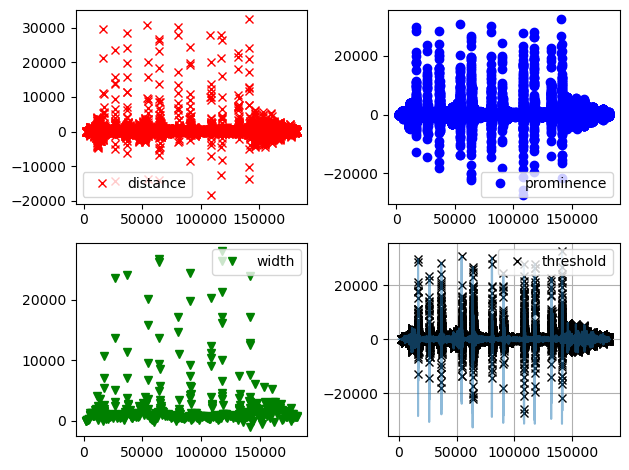

In [18]:
import av
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

container = av.open('1.m4a')
data = np.empty(shape=0)

for packet in container.demux():
    for frame in packet.decode():
        if isinstance(frame, av.audio.frame.AudioFrame):
            layout = frame.layout
            channels = layout.channels
            print(frame.format, frame.layout, frame.rate, frame.samples)

            array = frame.to_ndarray()
            if channels == 2:  # Stereo
                # Use left channel (array[0]) or right channel (array[1])
                audio_data = array[0]  # Left channel
            else:  # Mono
                audio_data = array[0]

            data = np.concatenate([data, audio_data])

# Optional: Normalize the data for peak detection
data = np.int16(data / np.max(np.abs(data)) * 32767)

# Detect peaks with different criteria
peaks, _ = find_peaks(data, distance=25)
peaks2, _ = find_peaks(data, prominence=1)
peaks3, _ = find_peaks(data, width=20)
peaks4, _ = find_peaks(data, threshold=0.4)

# Plotting results
plt.subplot(2, 2, 1)
plt.plot(peaks, data[peaks], "xr")
plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, data[peaks2], "ob")
plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, data[peaks3], "vg")
plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, data[peaks4], "xk")
plt.legend(['threshold'])

# Plot the entire signal
plt.plot(data, alpha=0.5)
plt.grid()
plt.tight_layout()
plt.show()


In [17]:
container = av.open(
    '1.m4a')
container

<av.InputContainer '1.m4a'>

In [9]:
peaks/sr

array([0.3478125 , 0.34804167, 0.3483125 , 0.5481875 , 0.765125  ,
       0.76541667, 0.7685625 , 1.13264583, 1.33172917, 1.33283333,
       1.3333125 , 1.33510417, 1.33554167, 1.3356875 , 1.67875   ,
       1.679125  , 1.68025   , 1.68054167, 1.88260417, 1.88352083,
       1.885875  , 2.25570833, 2.2559375 , 2.25829167, 2.25835417,
       2.2584375 , 2.2585    , 2.45002083, 2.4501875 , 2.45025   ,
       2.45066667, 2.45245833, 2.453     , 2.74683333, 2.94166667,
       2.94172917, 2.9420625 , 2.9424375 , 2.94372917, 2.945625  ])

In [11]:
y[peaks]

array([-0.832428  ,  0.86727905,  0.8329773 , -0.89678955, -0.7614746 ,
        0.8288574 , -0.81381226,  0.89682007, -0.9562988 , -0.89151   ,
        0.7649231 ,  0.7816467 , -0.78125   , -0.8040161 , -0.8420105 ,
        0.88308716, -0.76272583,  0.81604004, -0.90667725, -0.82632446,
       -0.8271179 , -0.87789917,  0.8147888 , -0.90567017, -0.7619324 ,
       -0.9151306 , -0.86026   , -0.87649536,  0.8184204 ,  0.77578735,
       -0.8800049 , -0.91622925,  0.7696228 , -0.8635864 , -0.9170532 ,
        0.7785034 ,  0.9515991 , -0.7630615 , -0.77368164, -0.77627563],
      dtype=float32)

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def plot_fft(audio_file):
    # Load the .m4a audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate

    # Perform FFT on the signal
    n = len(y)  # Number of samples in the signal
    fft_values = np.fft.fft(y)  # Compute the FFT
    fft_magnitude = np.abs(fft_values)  # Magnitude of the FFT

    # Create frequency bins
    freqs = np.fft.fftfreq(n, 1/sr)

    # Only keep the positive half of the spectrum
    positive_freqs = freqs[:n // 2]
    positive_magnitude = fft_magnitude[:n // 2]

    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_magnitude, color='b')
    plt.title(f'FFT of the audio signal ({audio_file})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Loop through the segments and plot FFT
for i in range(1, 41):  # Assuming you want to process 40 segments (1 to 40)
    audio_file = f'segment_{i}.wav'
    
    try:
        plot_fft(aud`io_file)  # Try to plot FFT for the segment
    except FileNotFoundError:
        print(f"{audio_file} not found.")


SyntaxError: invalid syntax (1155602697.py, line 35)

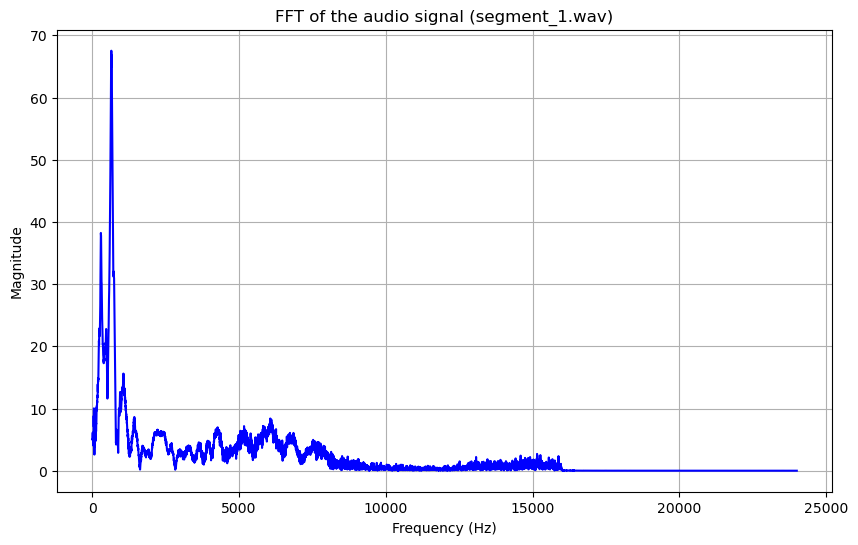

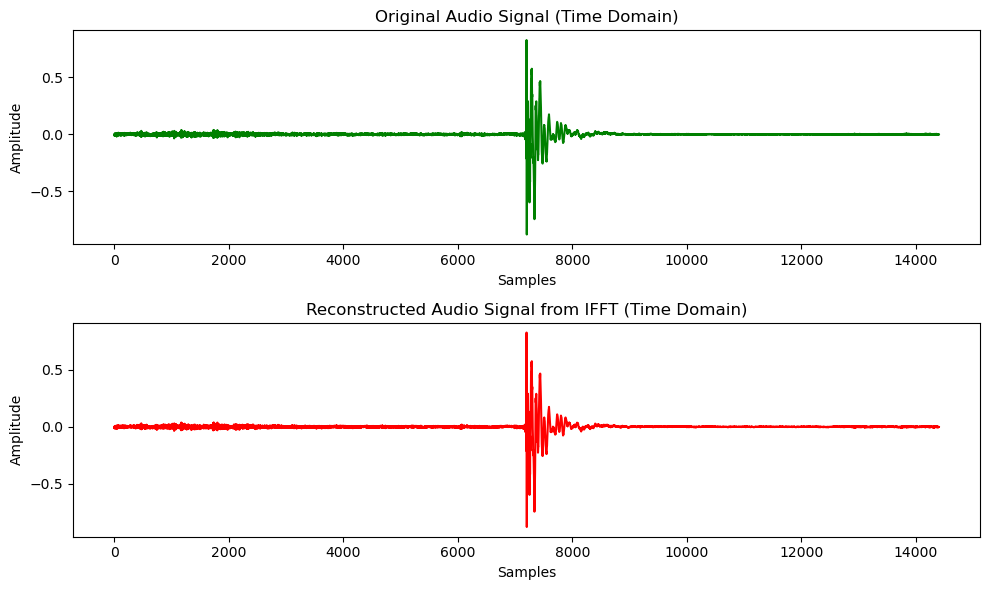

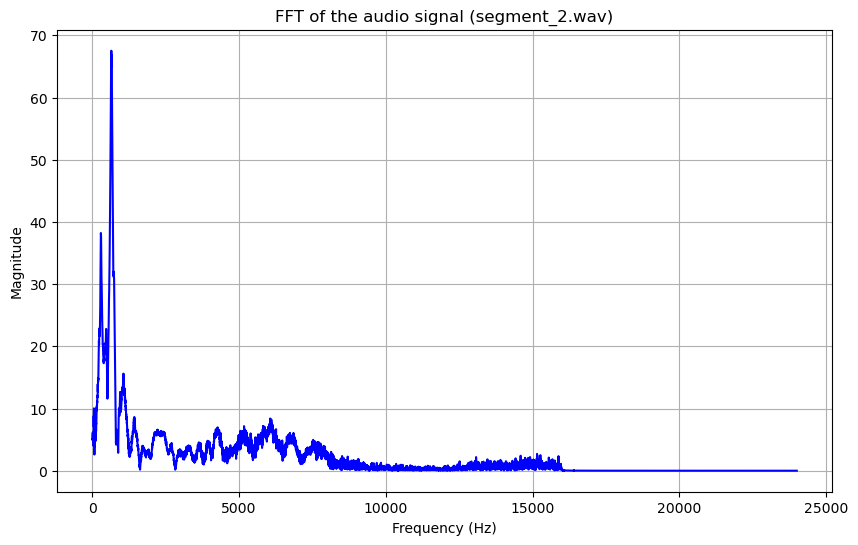

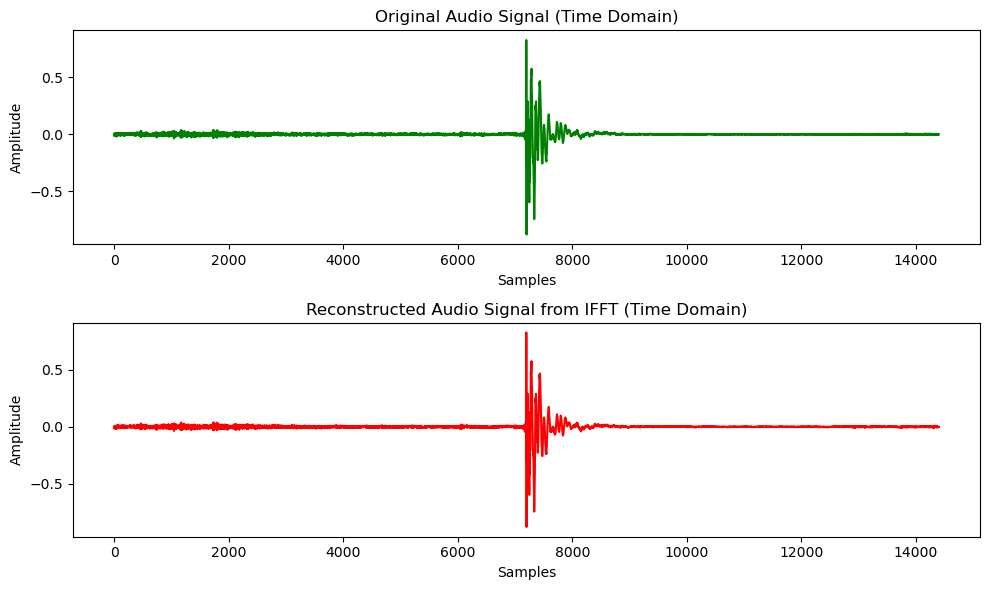

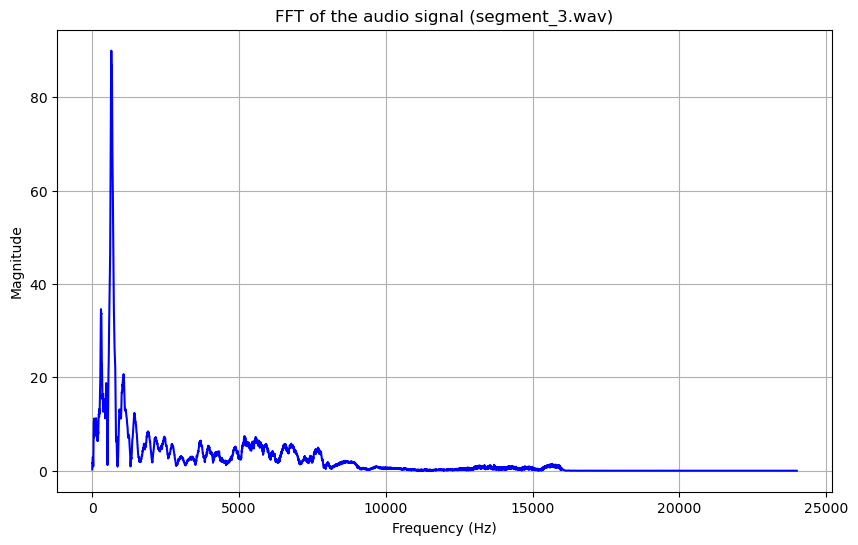

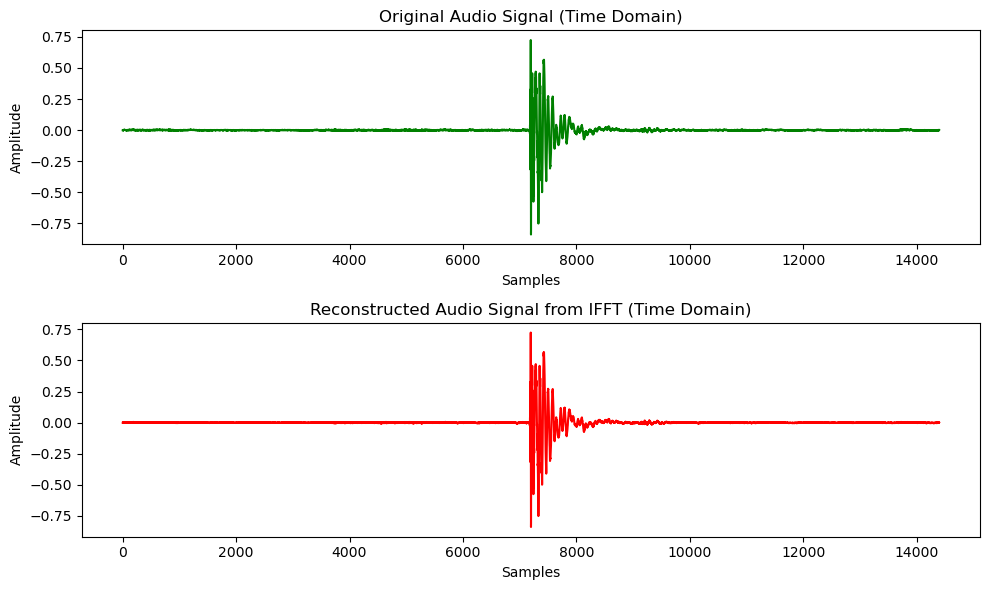

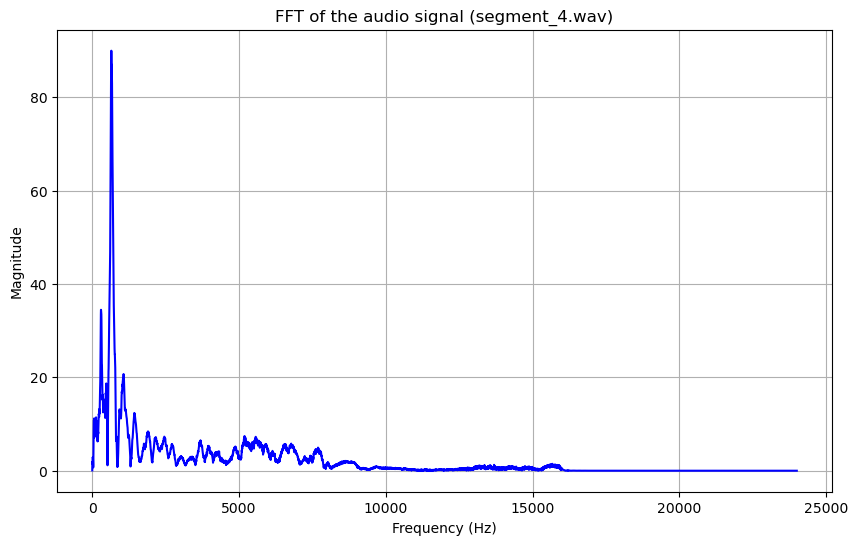

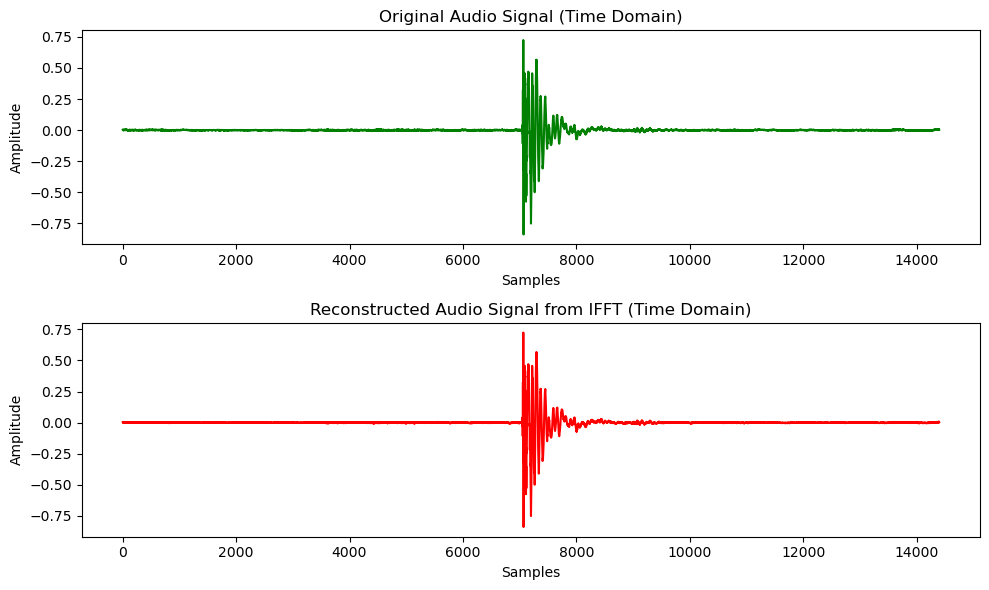

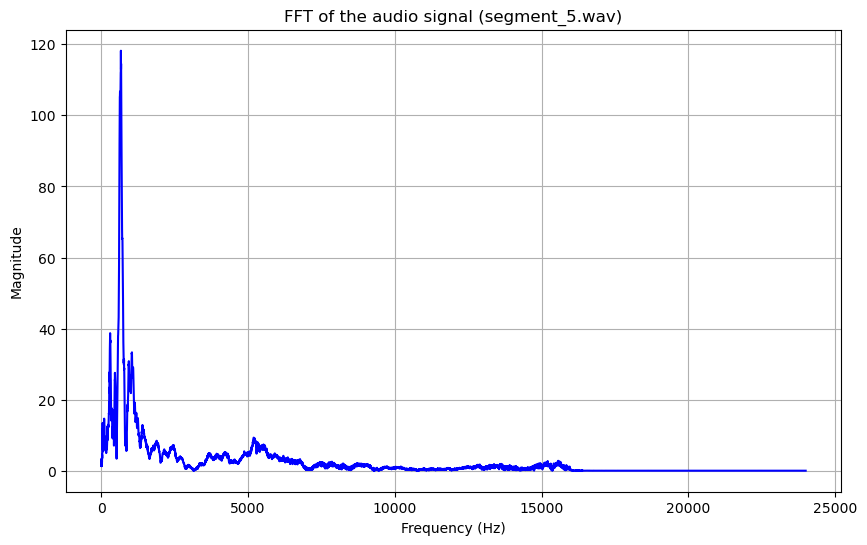

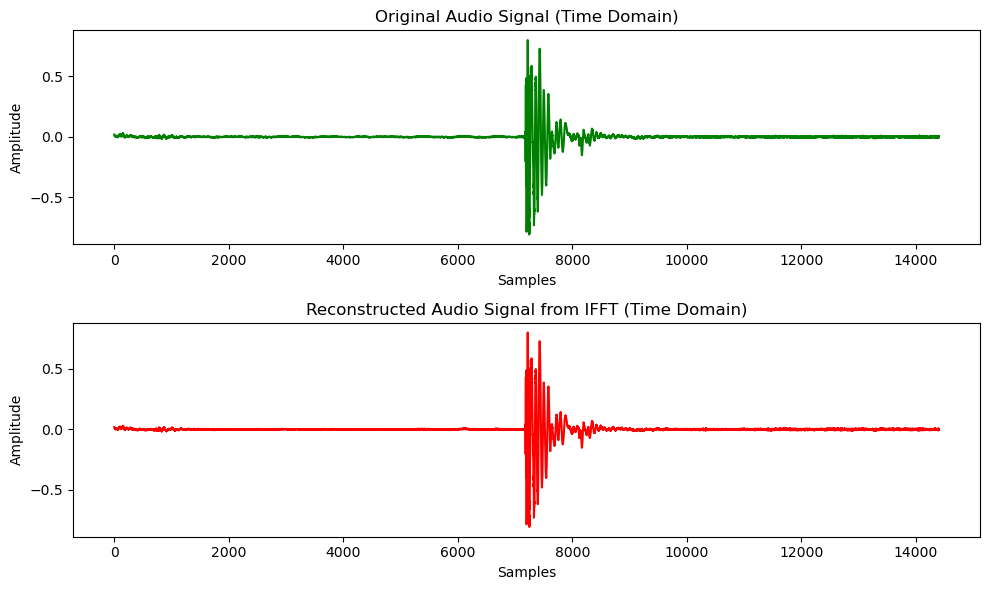

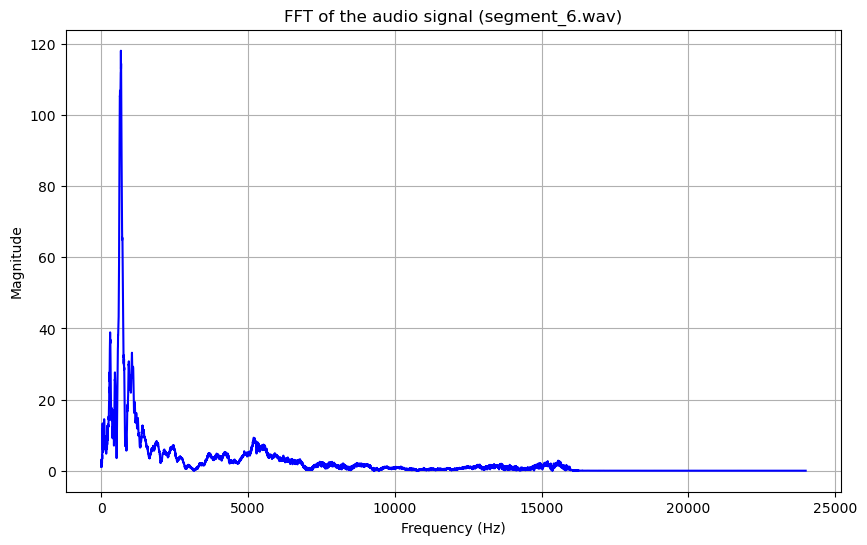

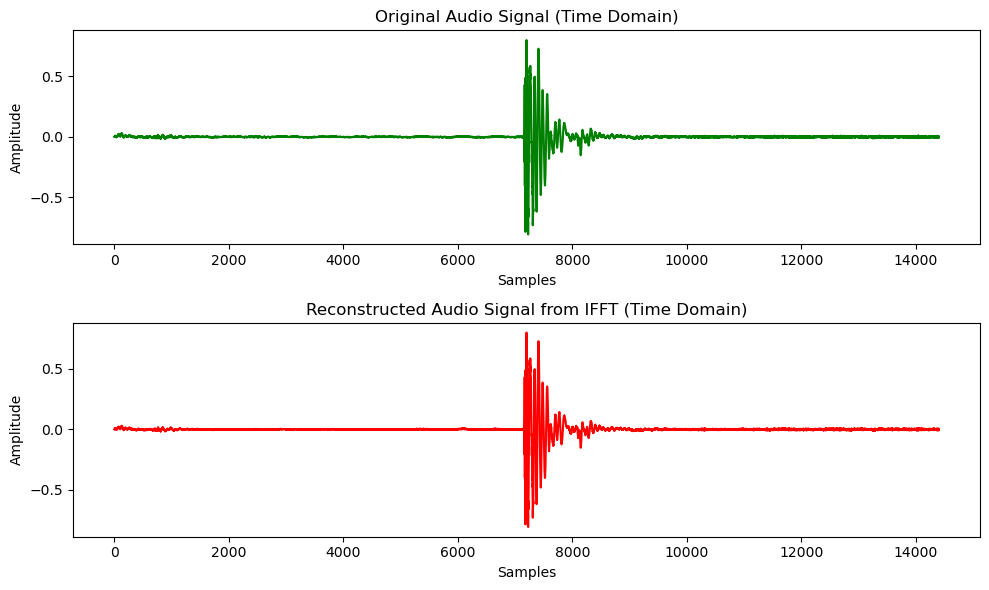

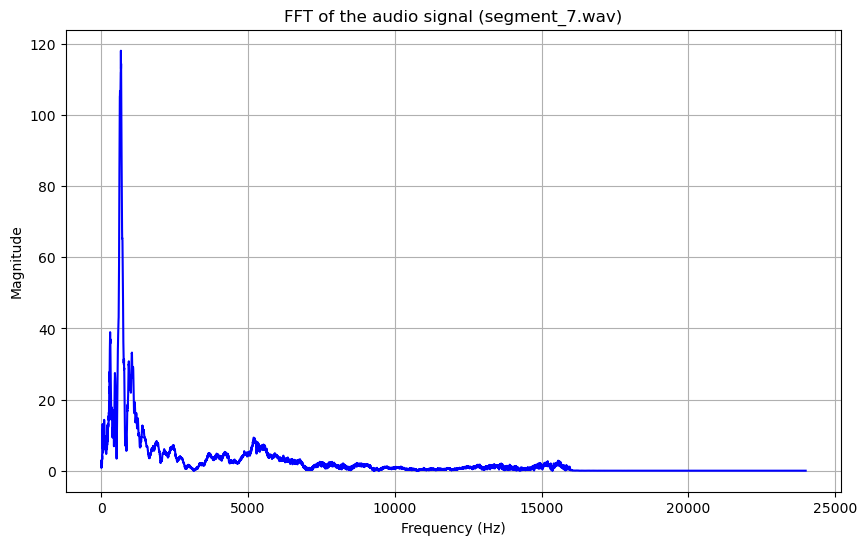

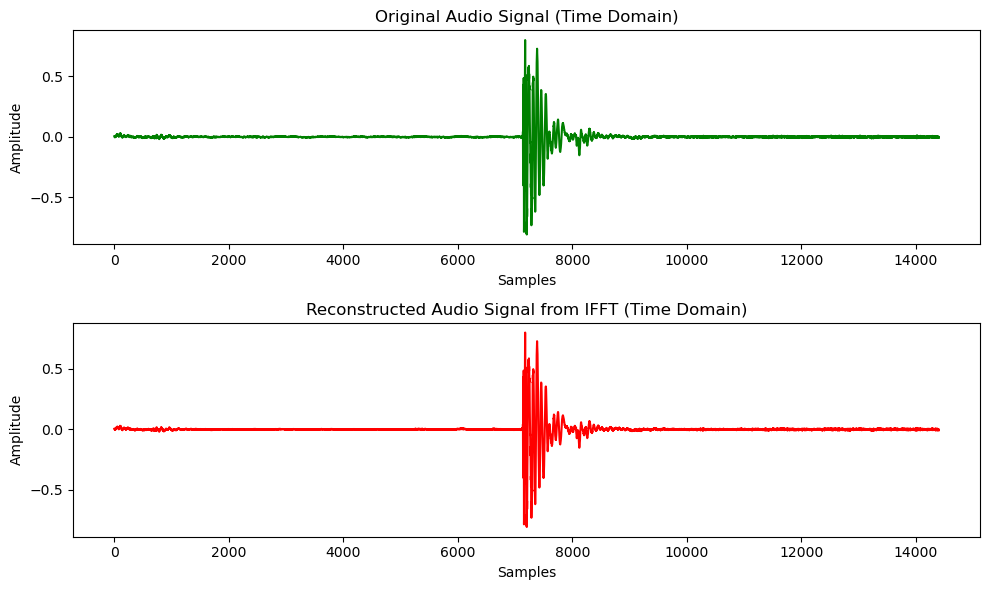

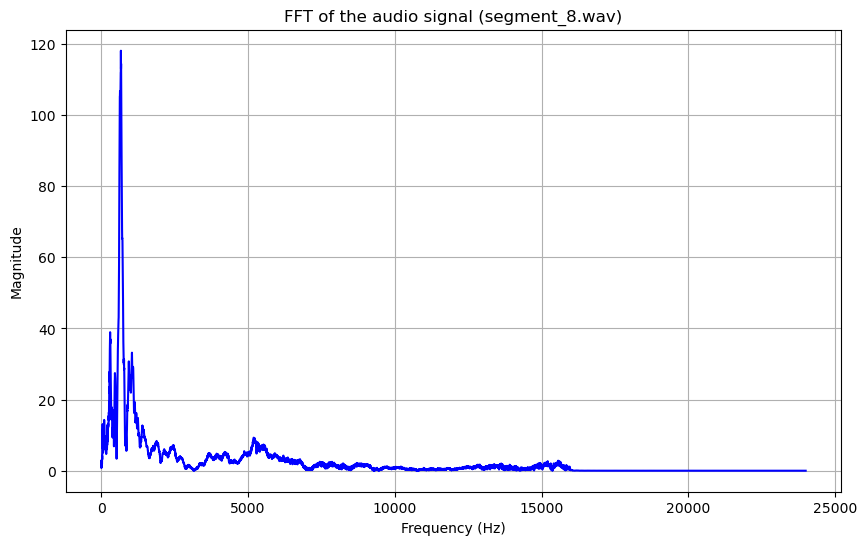

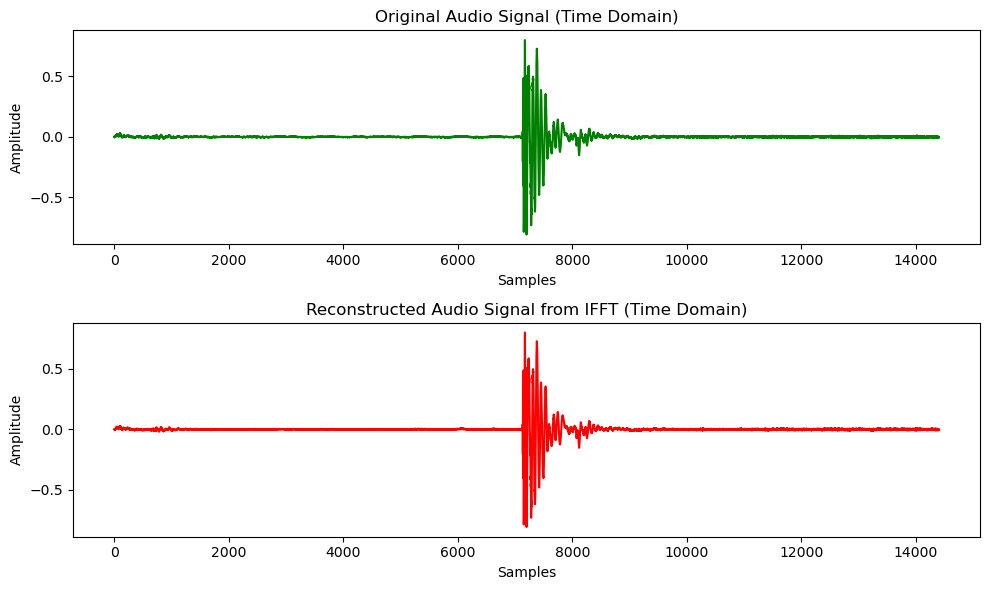

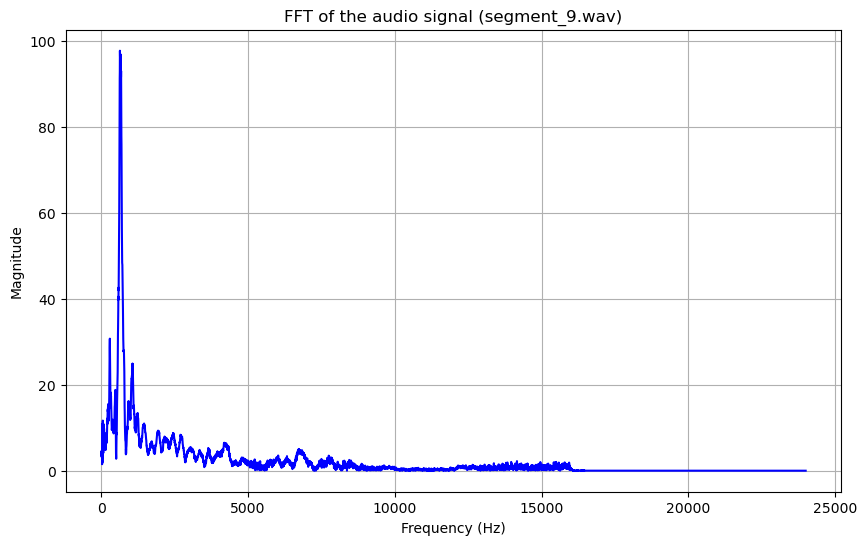

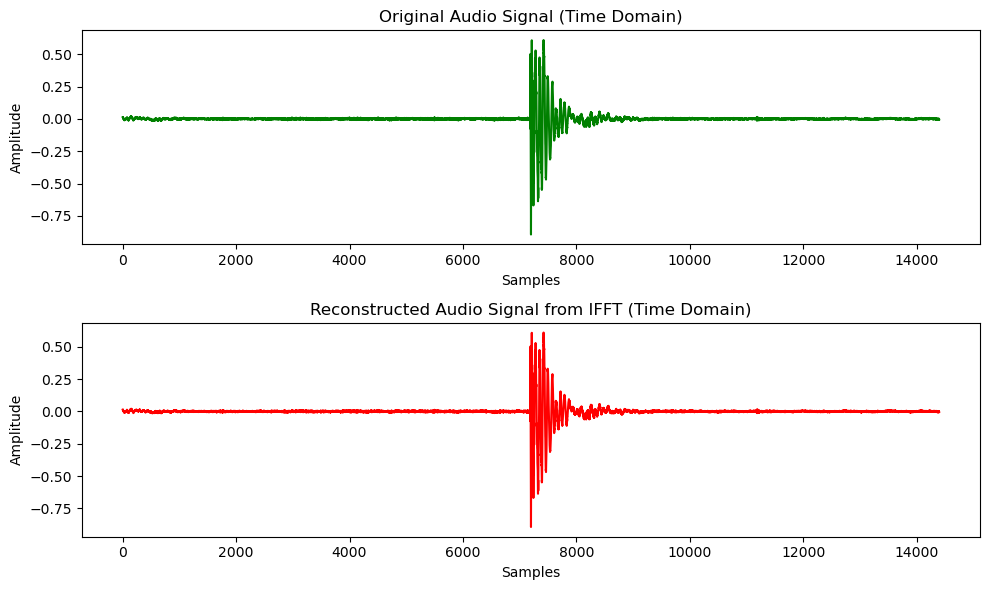

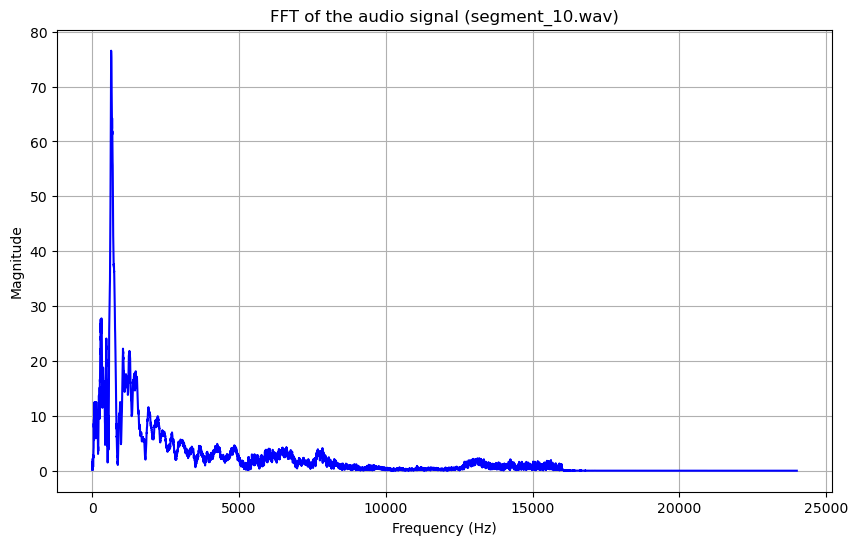

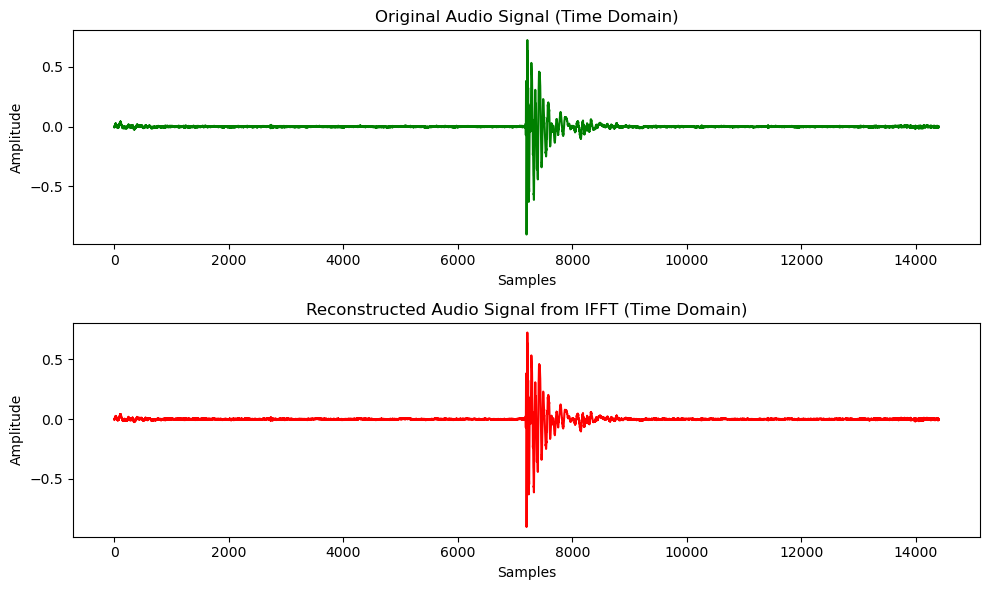

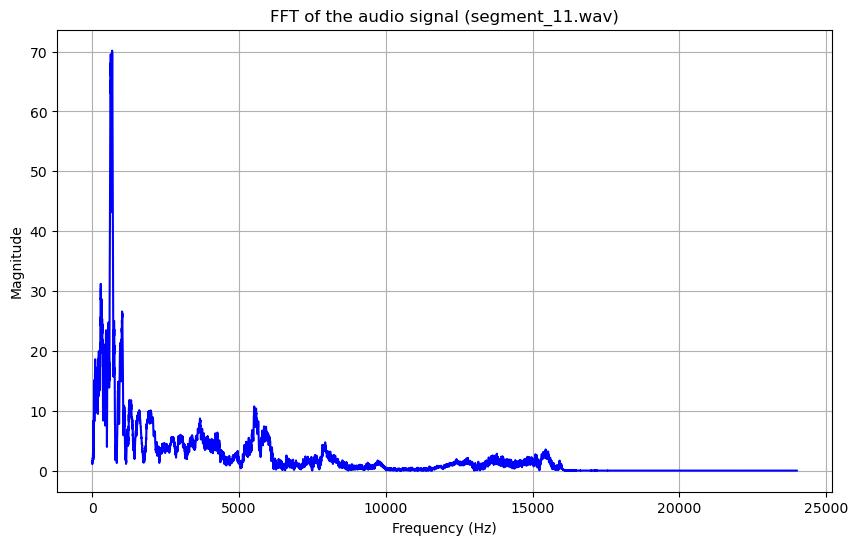

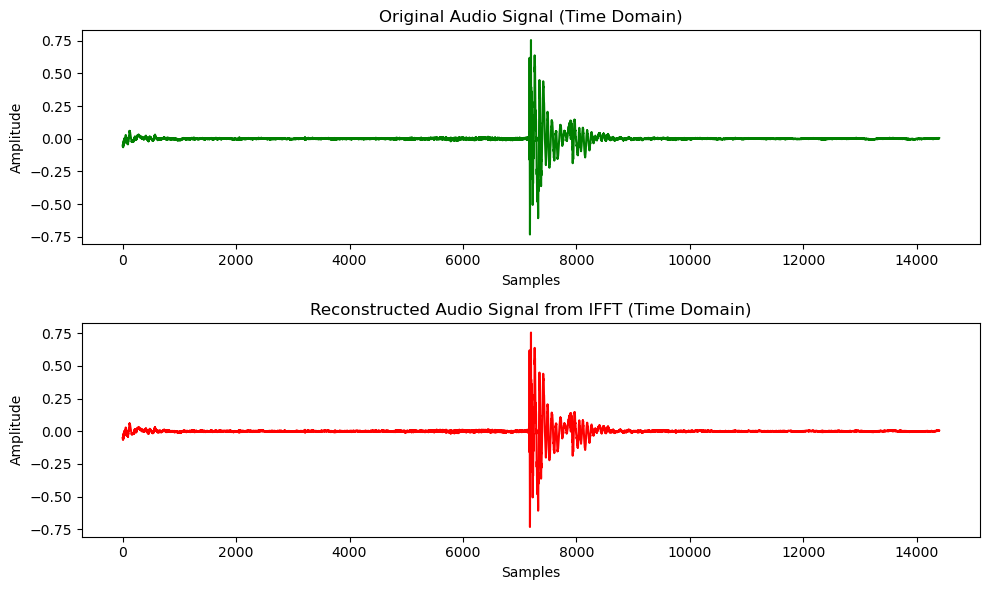

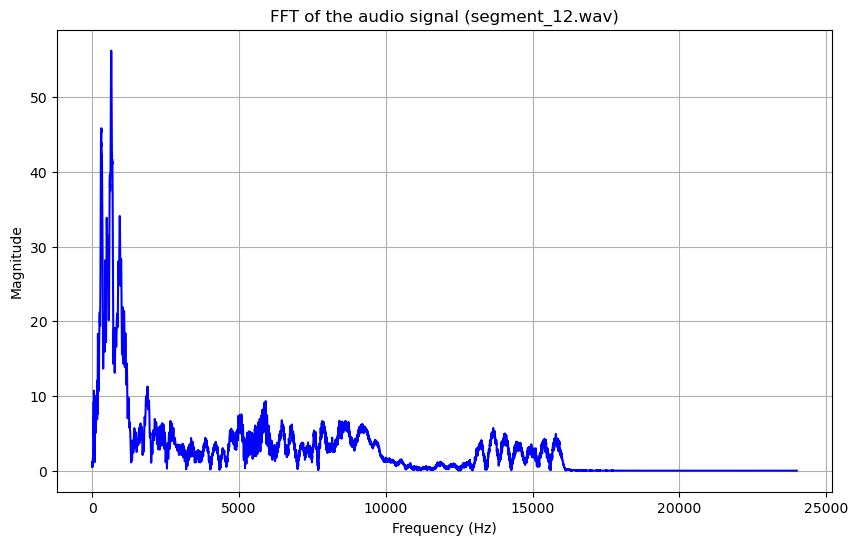

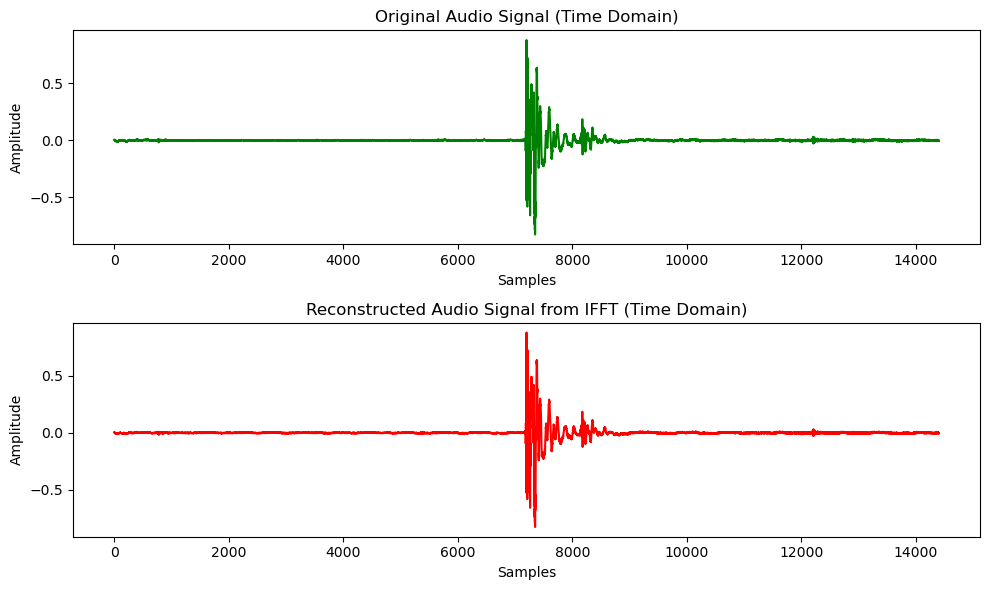

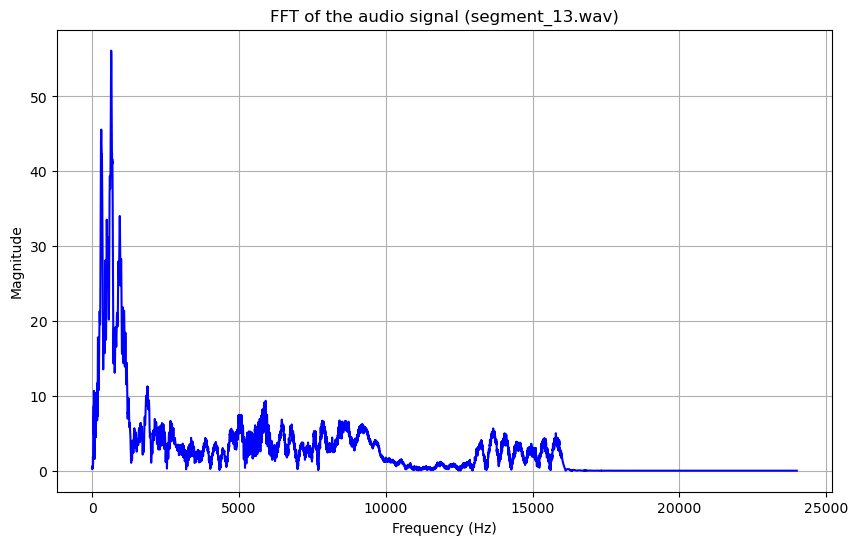

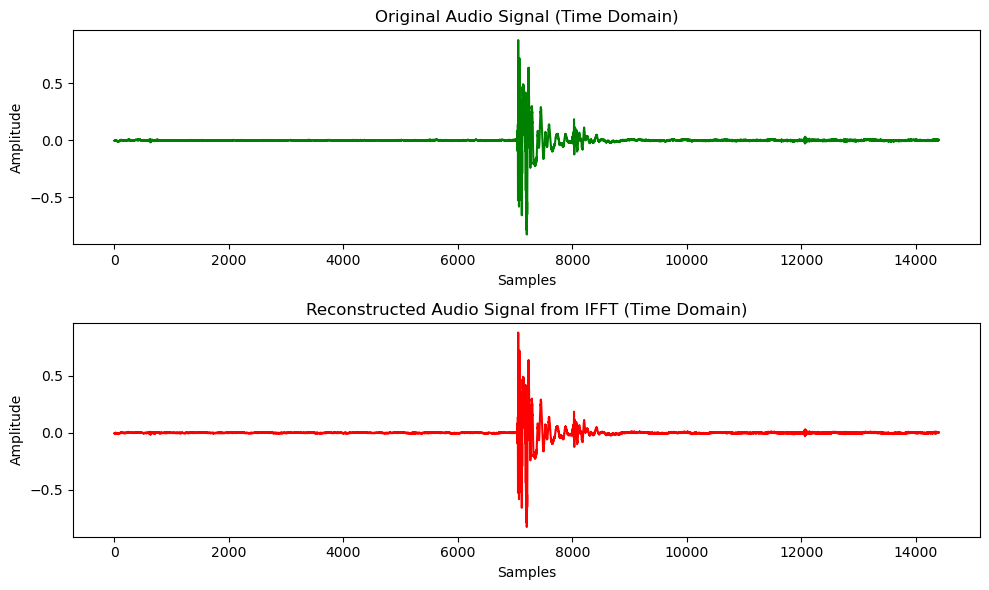

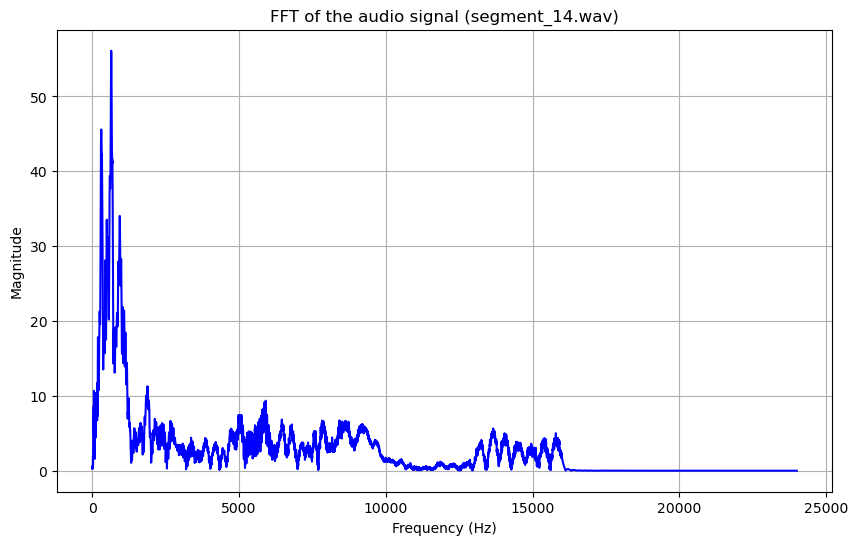

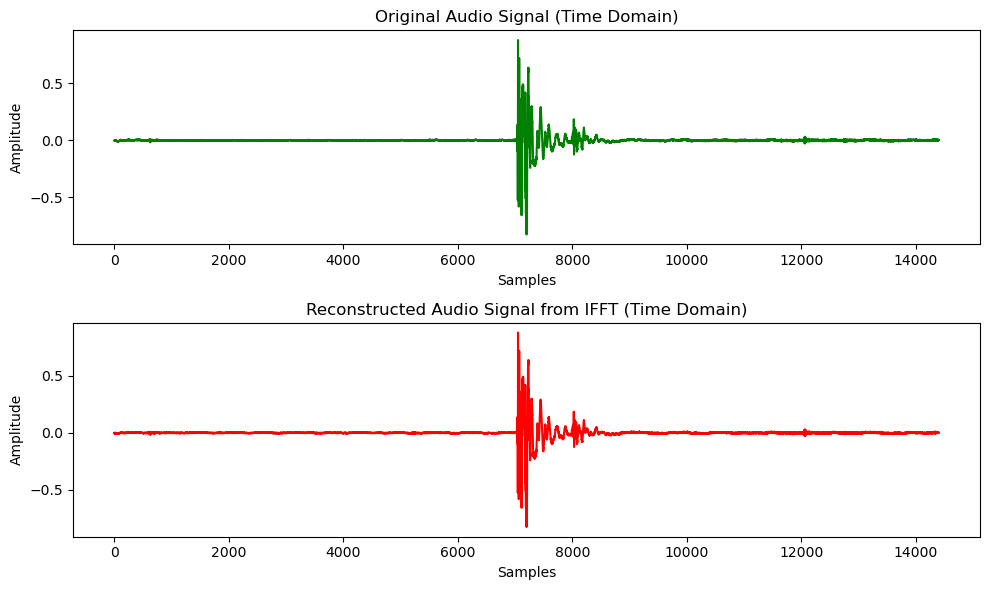

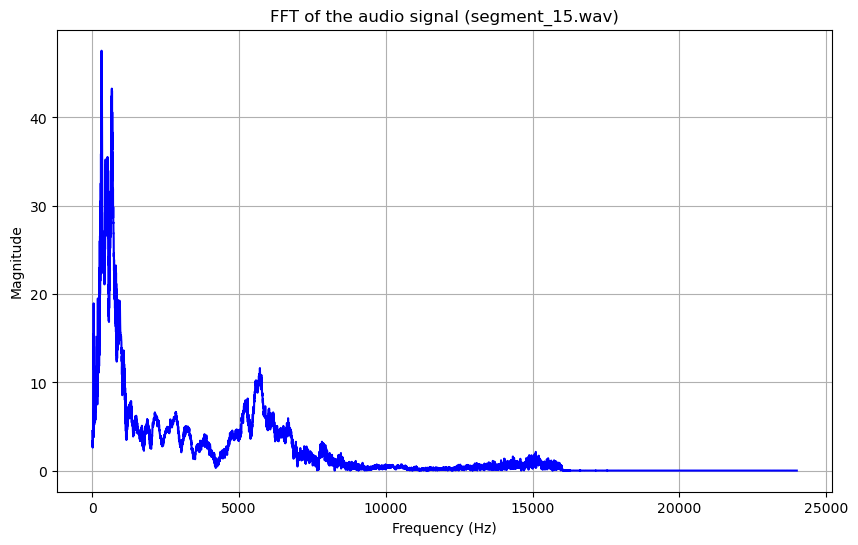

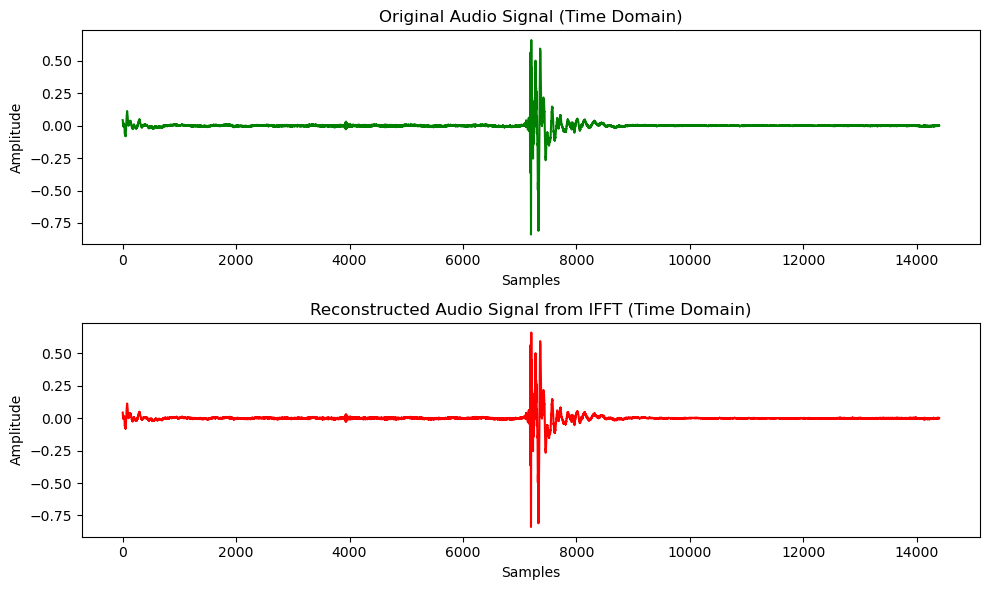

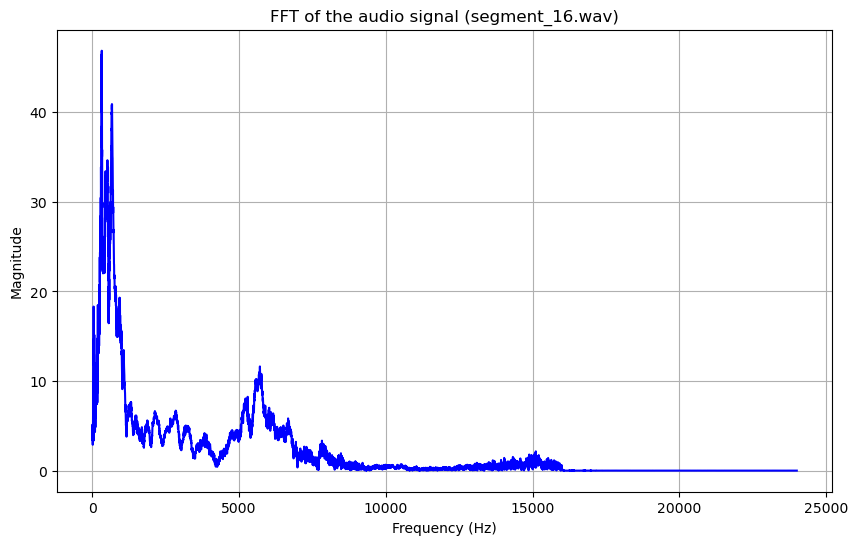

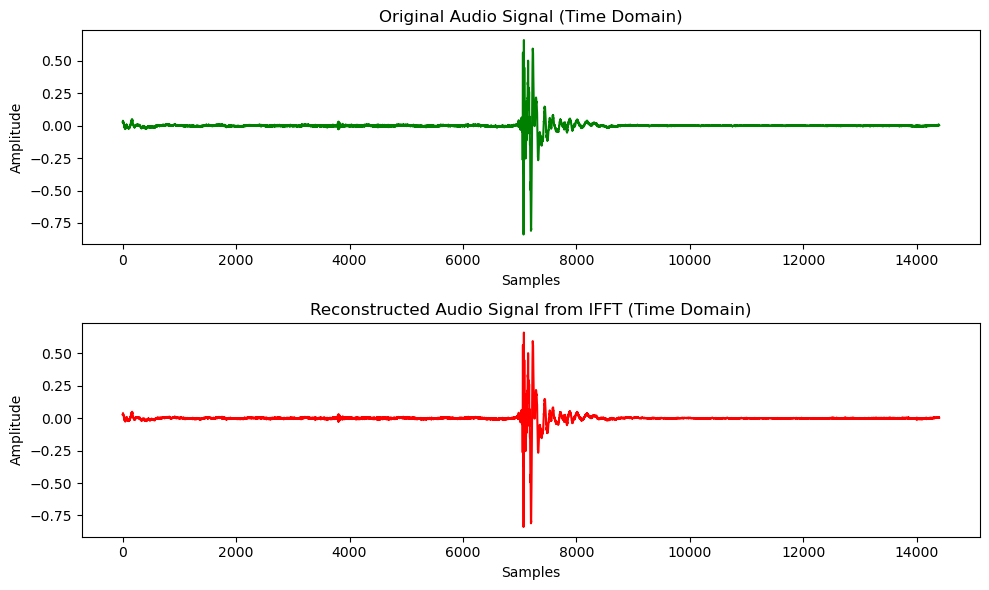

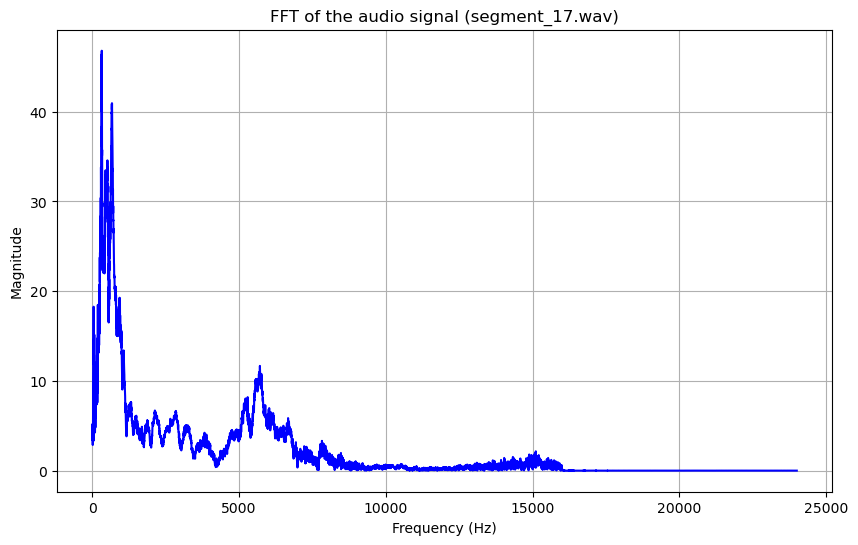

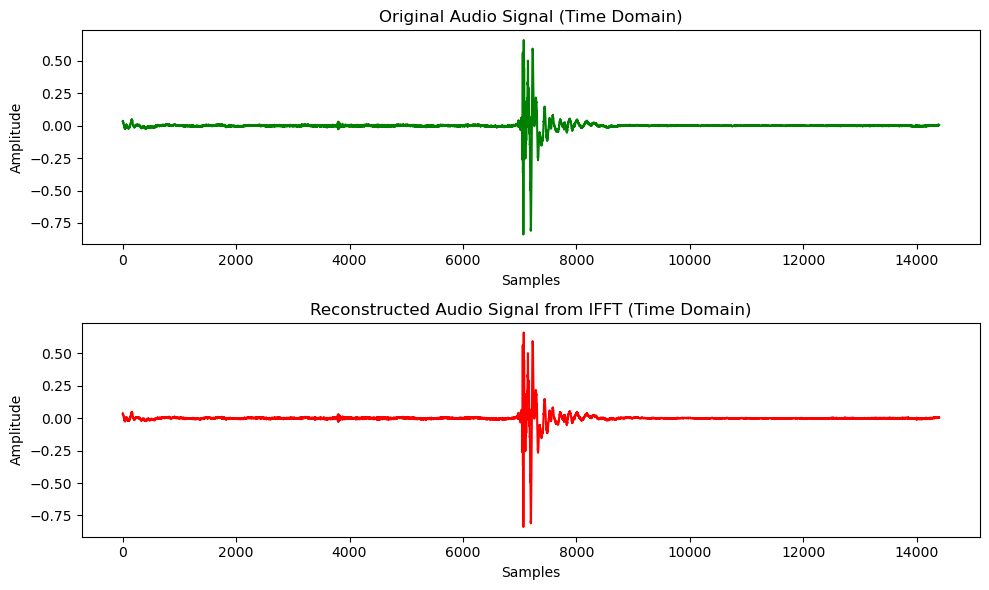

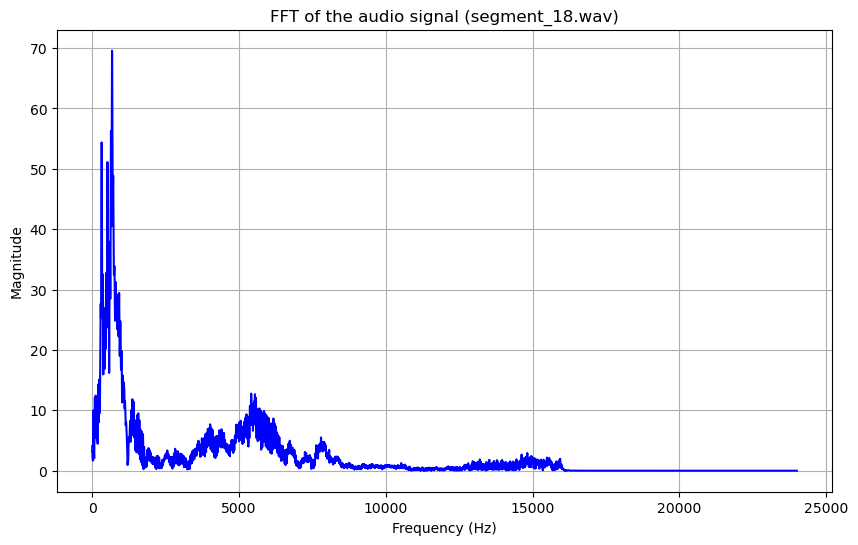

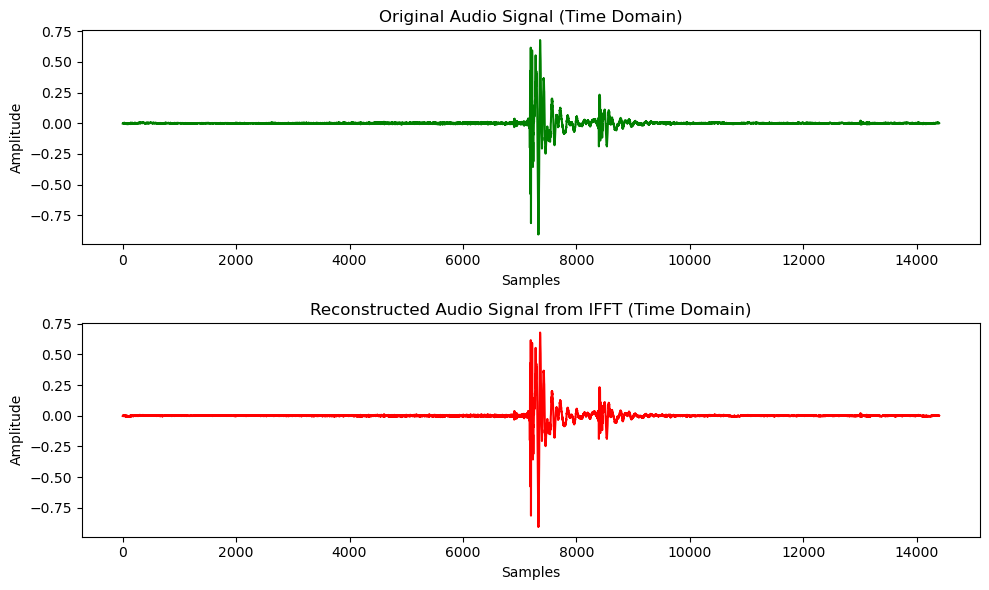

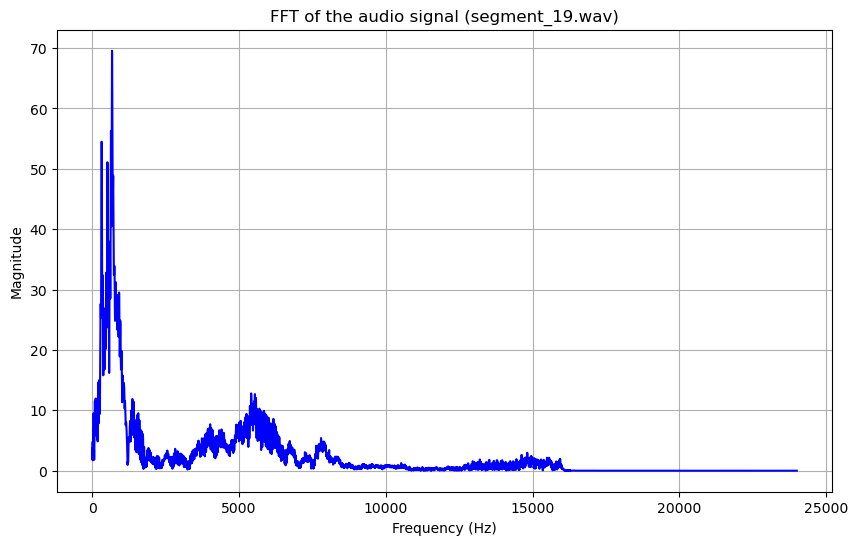

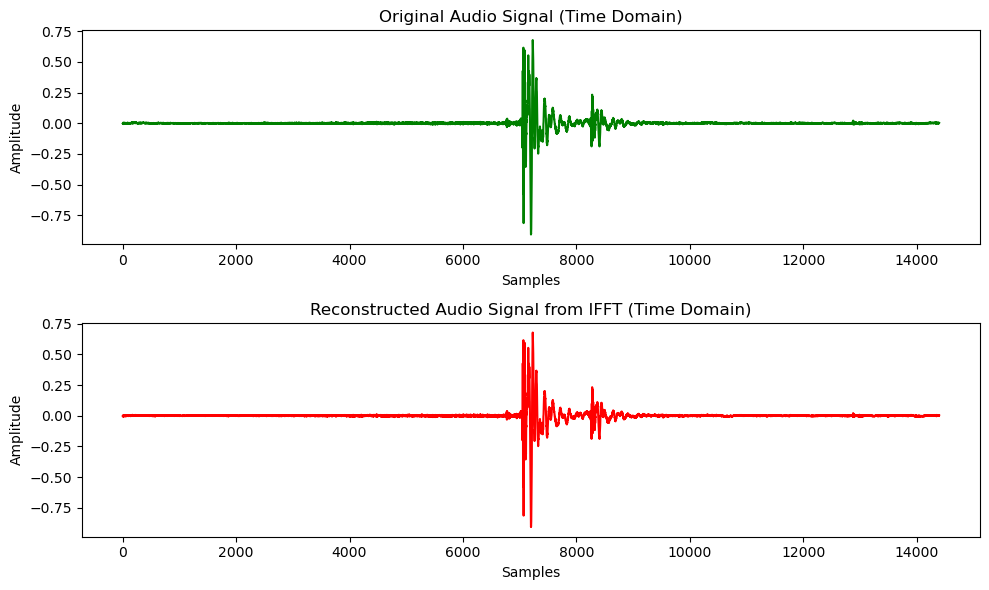

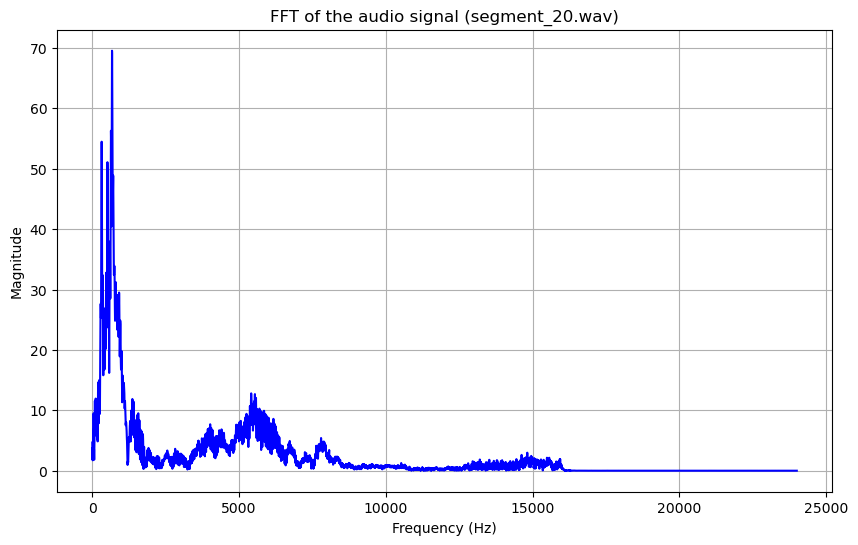

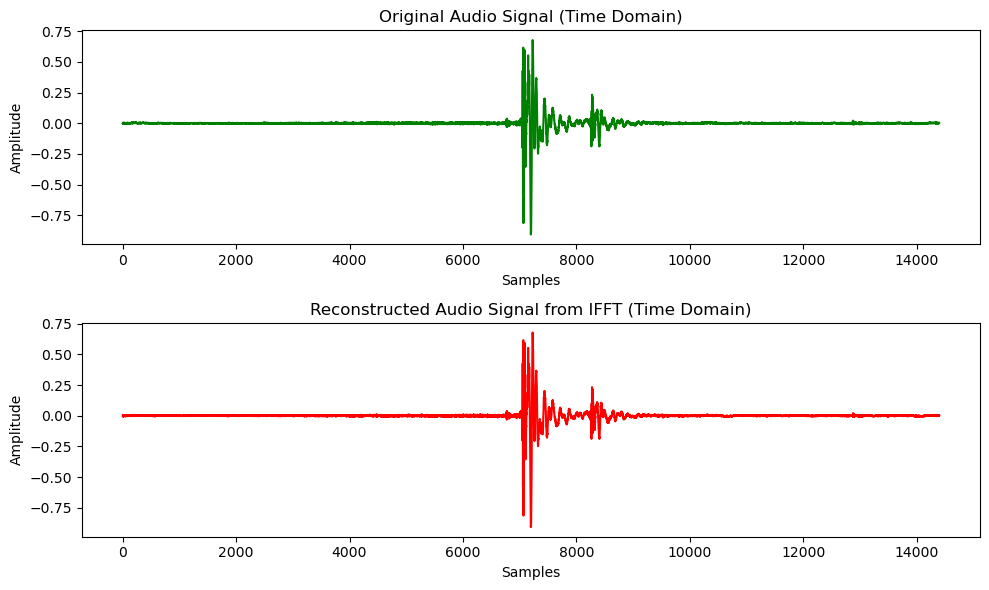

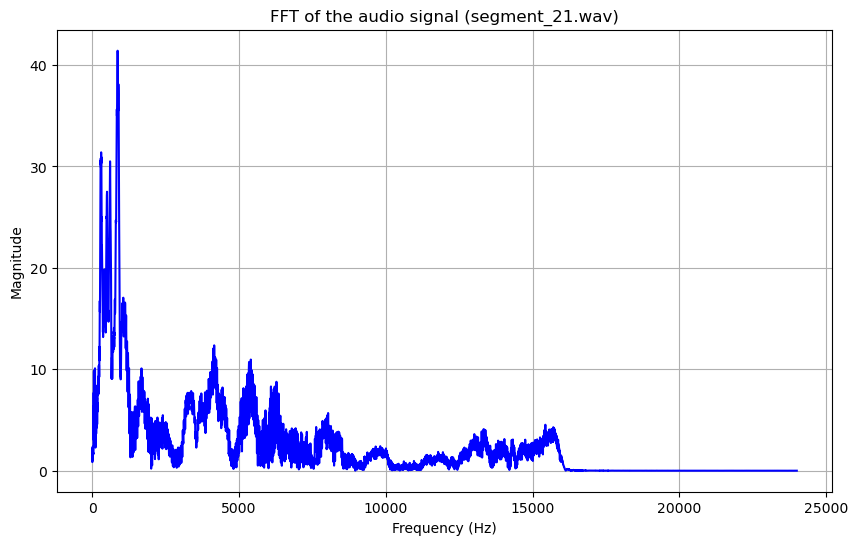

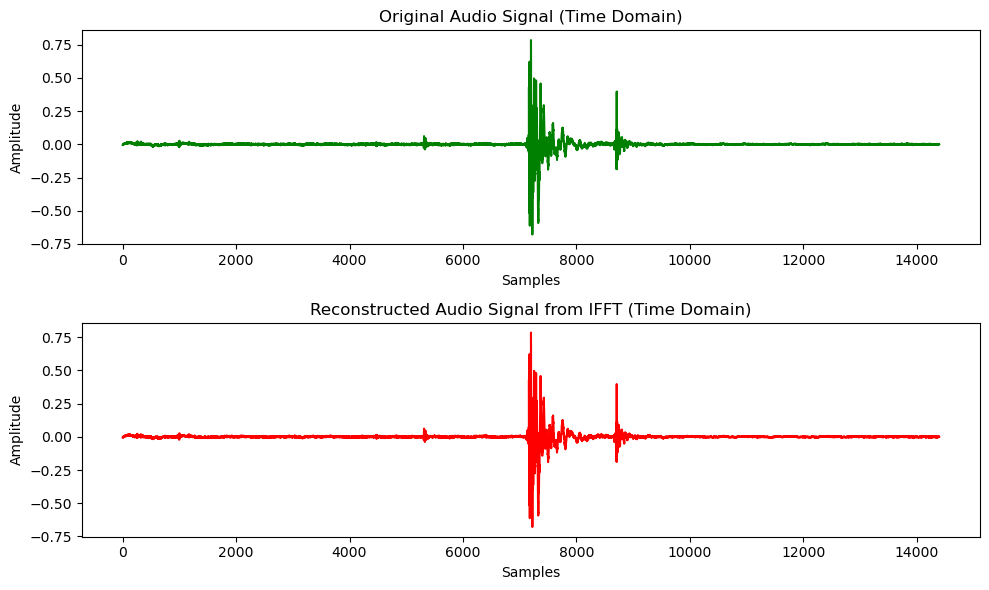

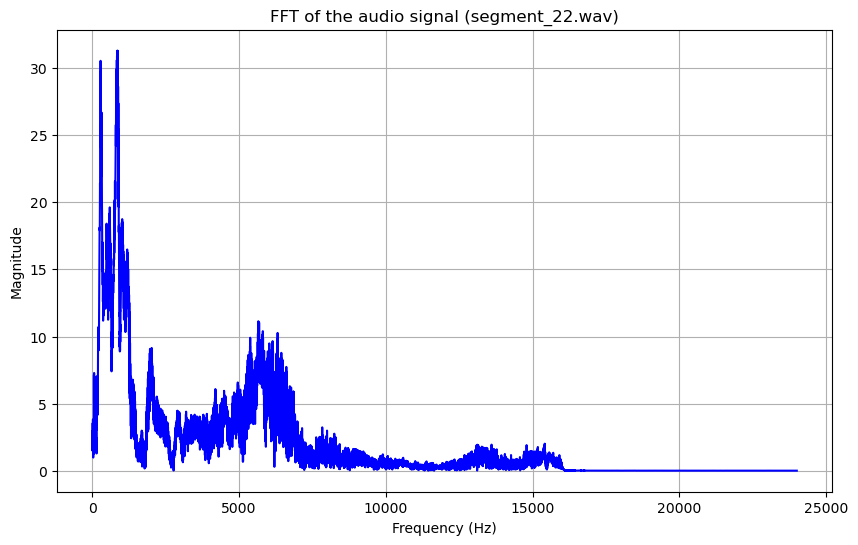

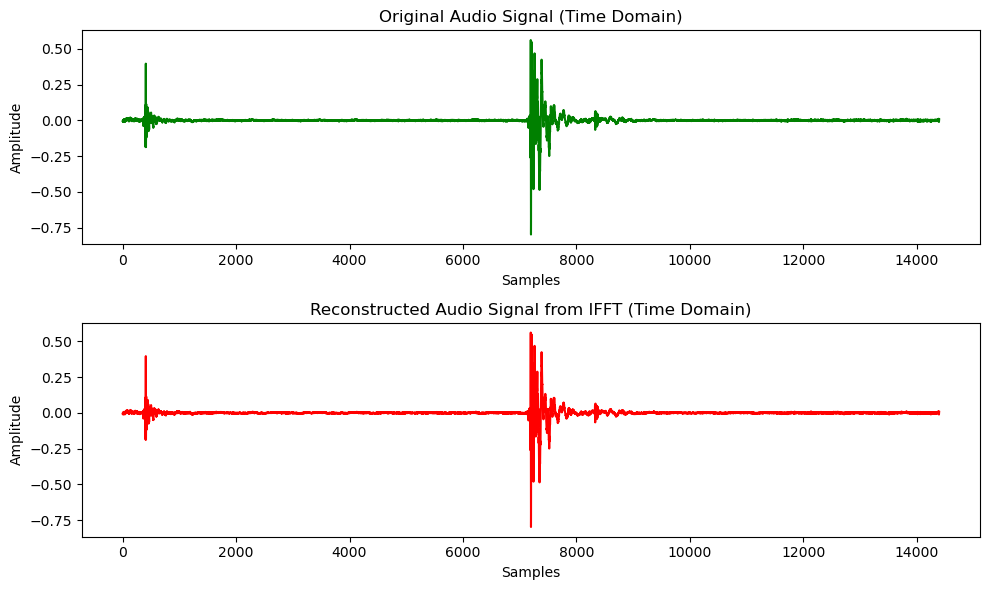

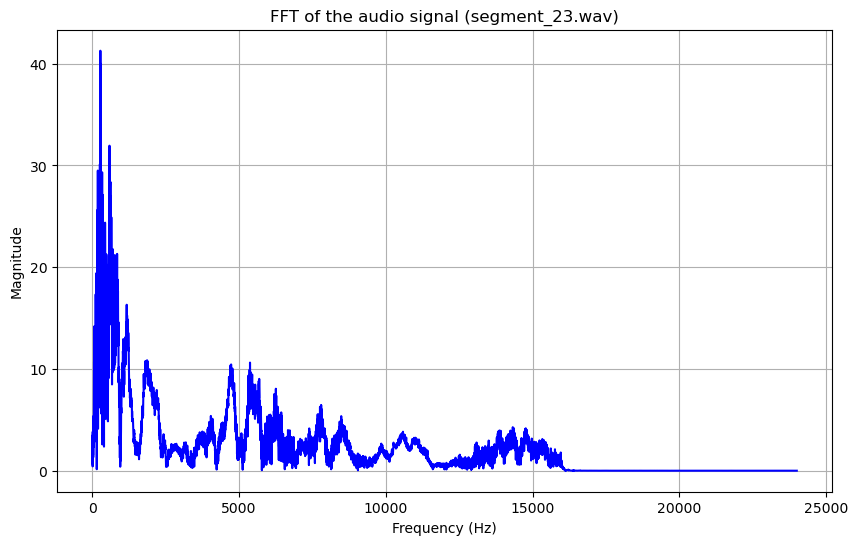

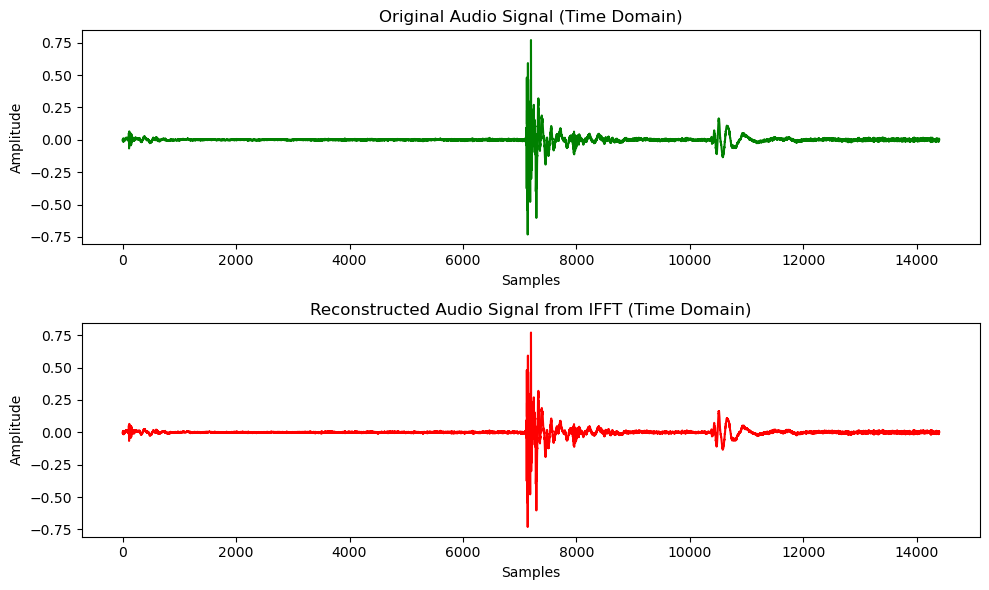

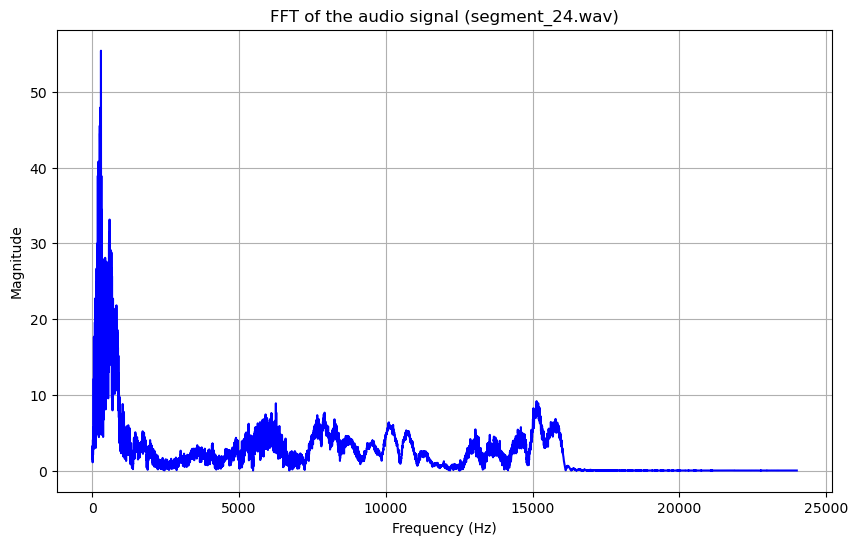

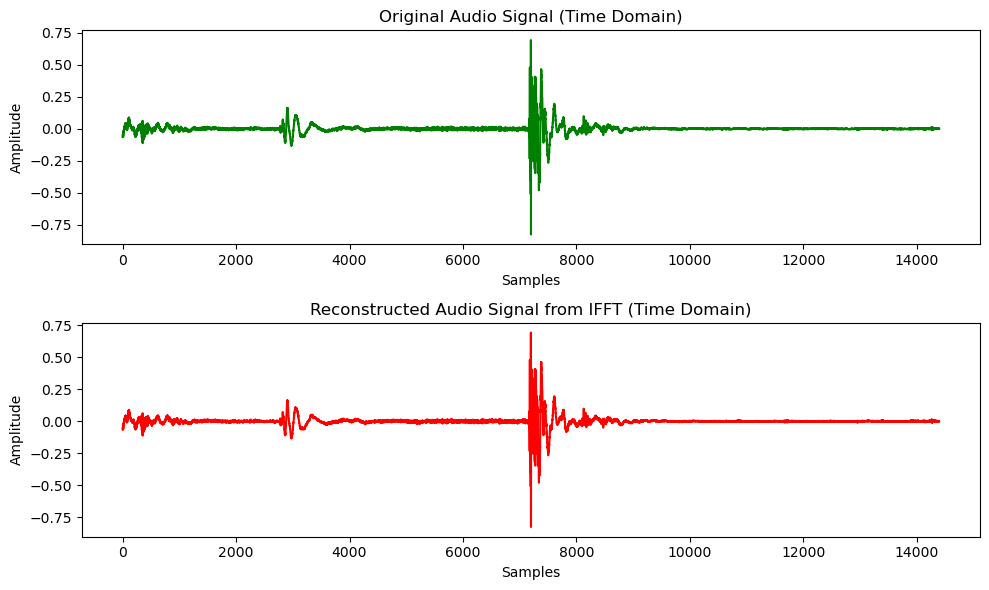

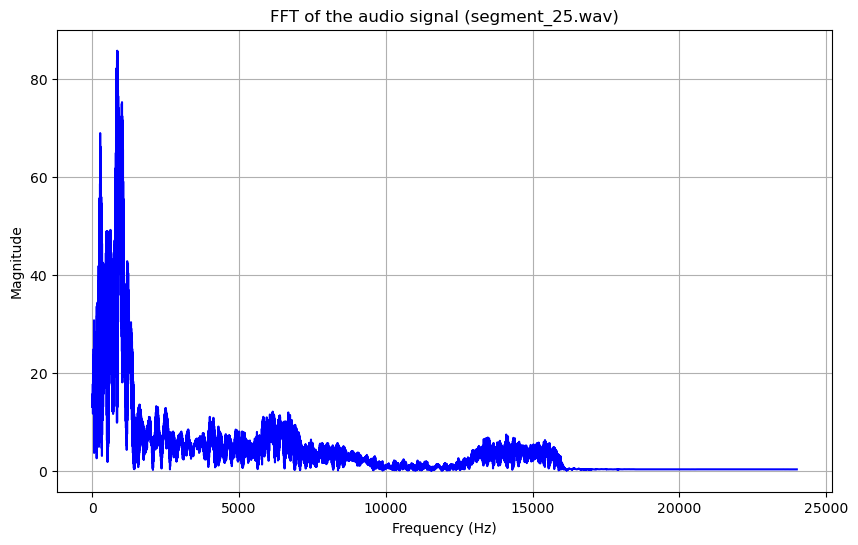

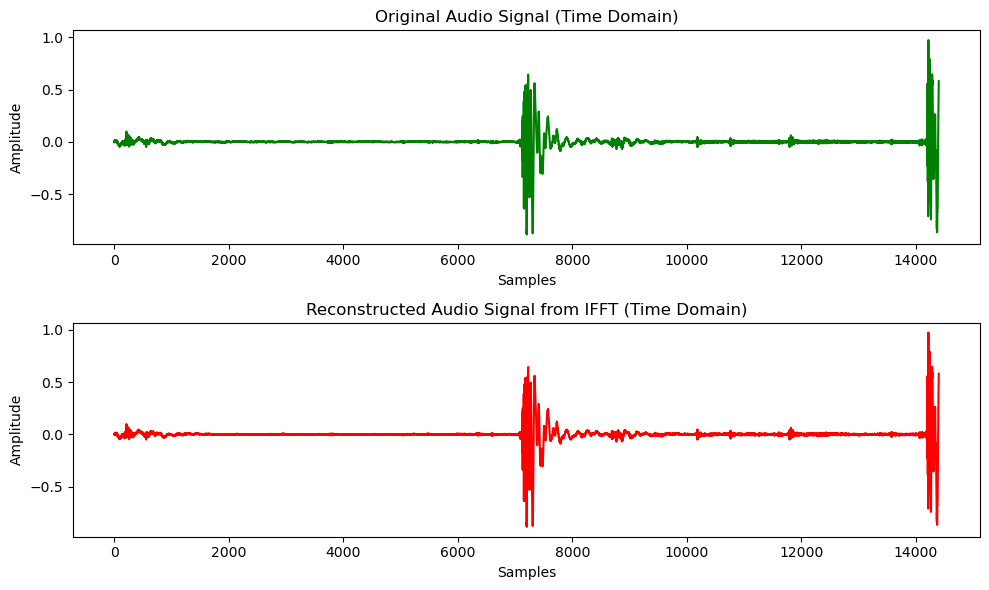

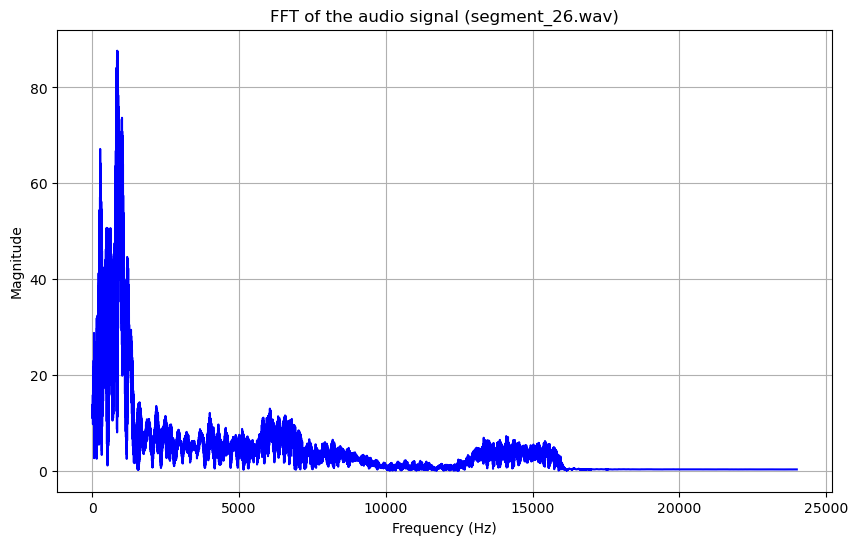

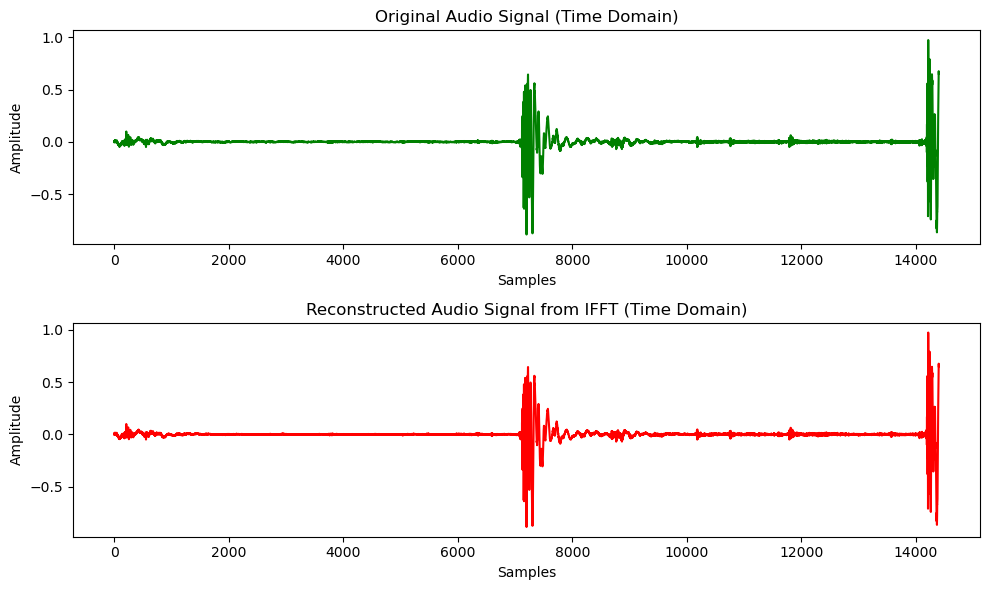

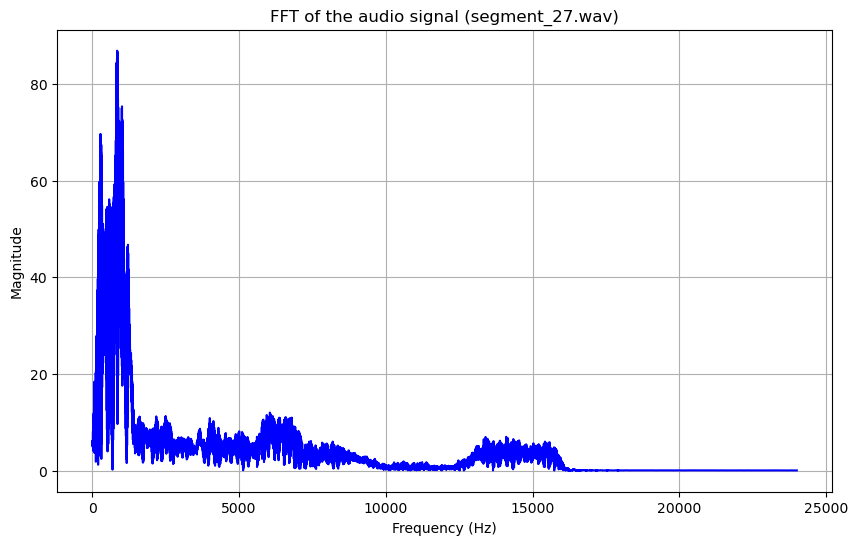

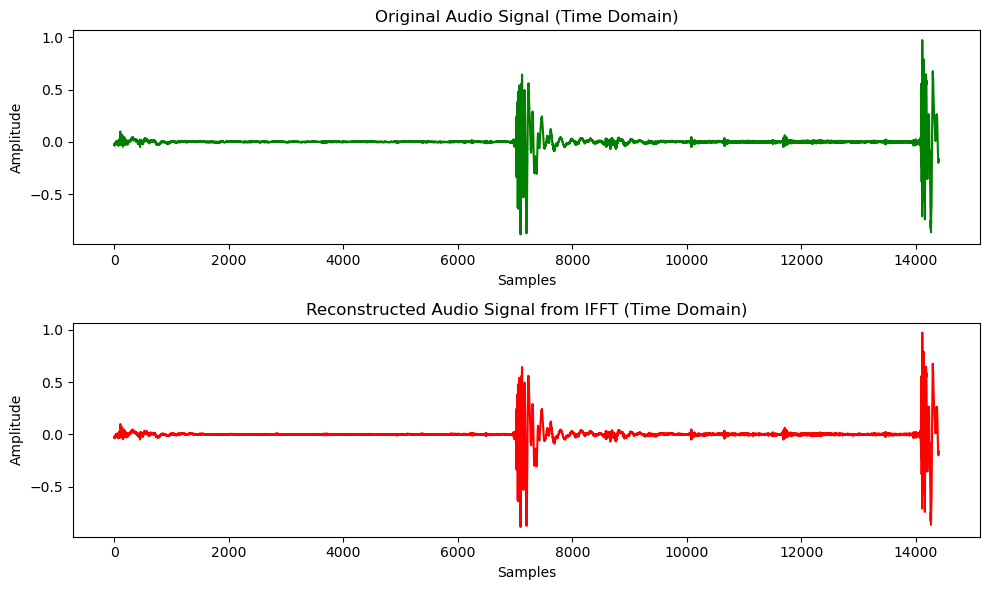

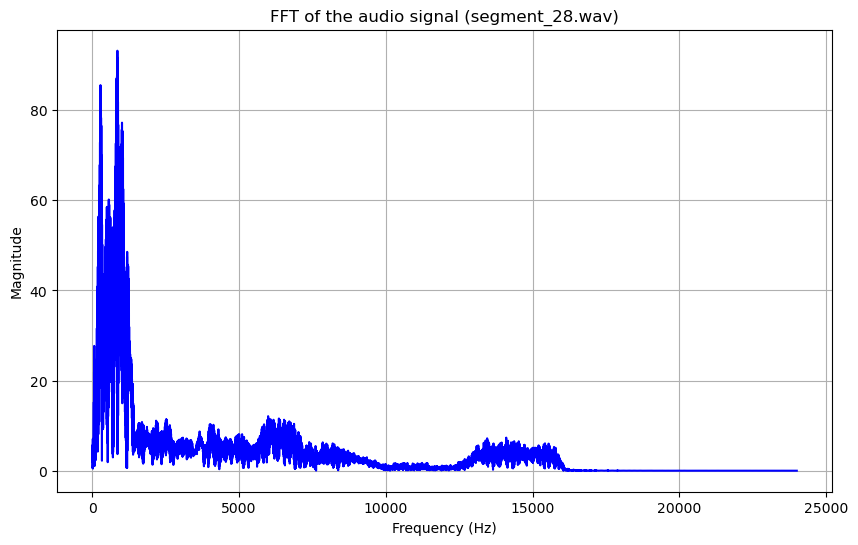

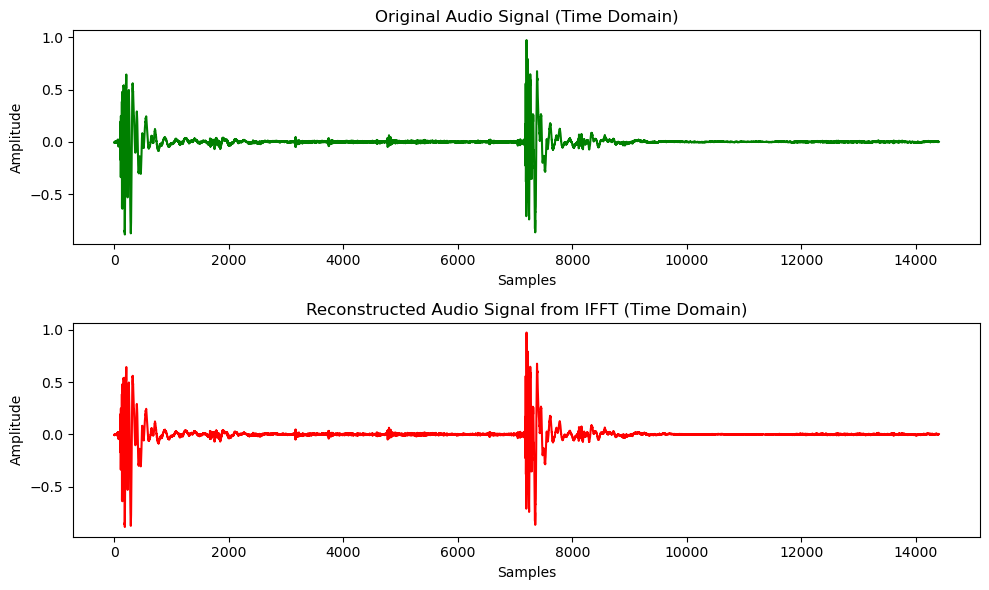

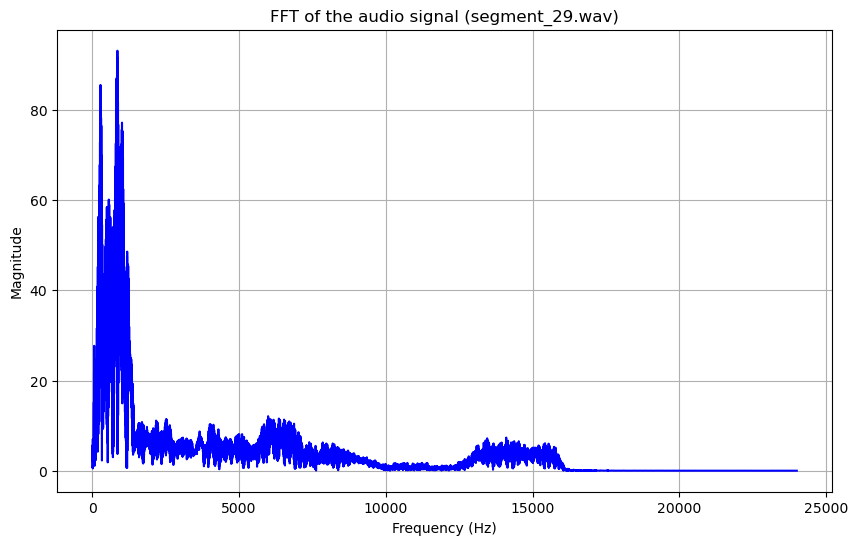

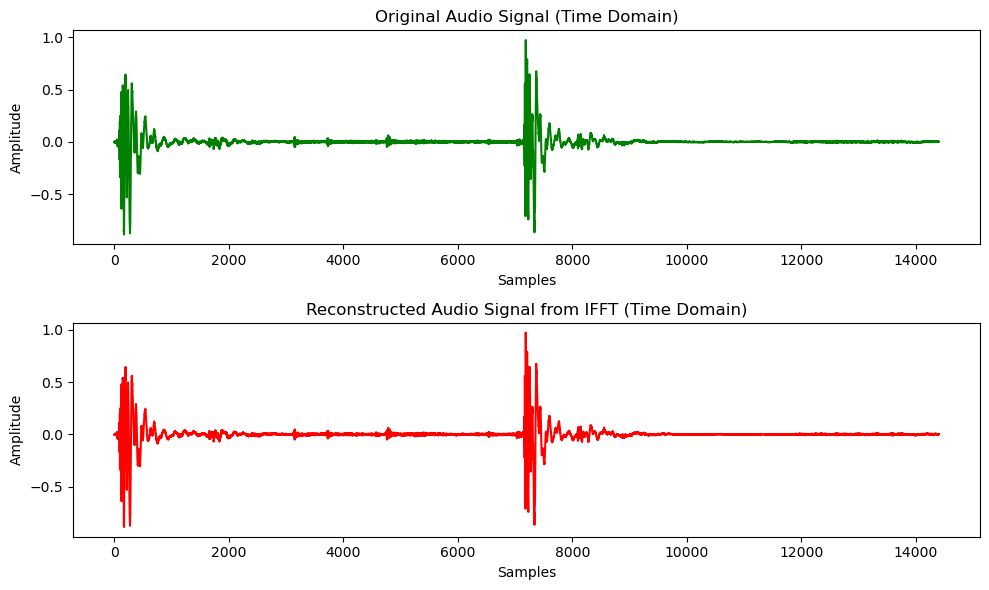

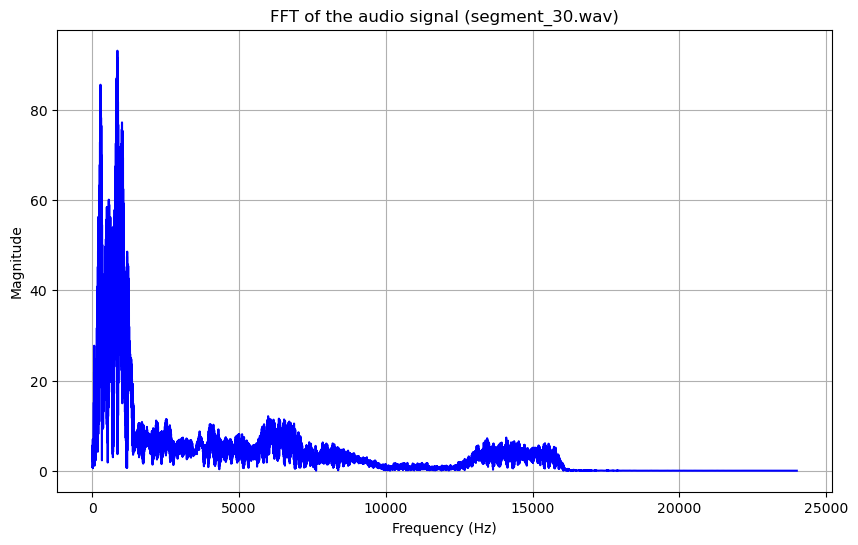

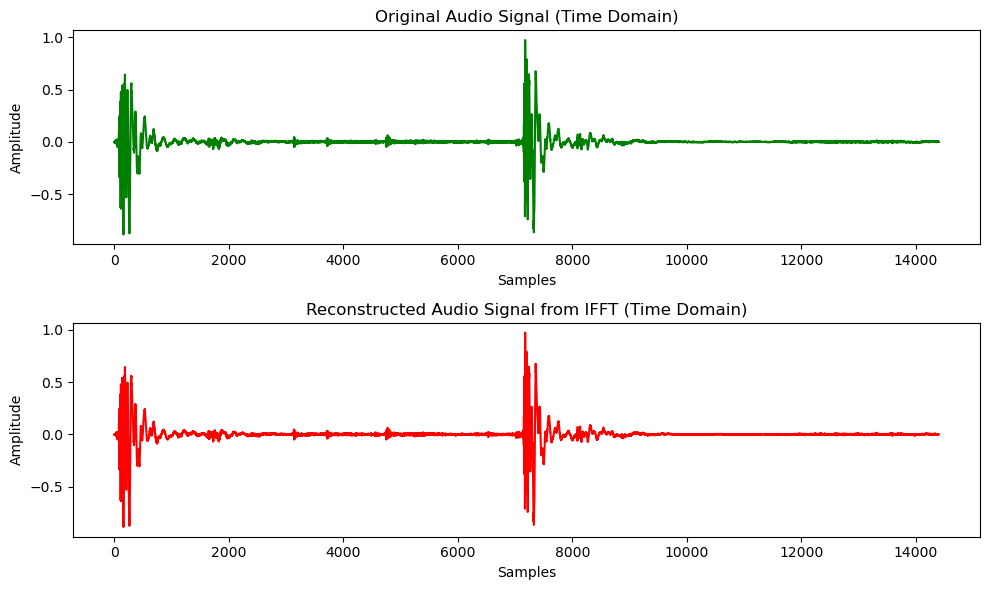

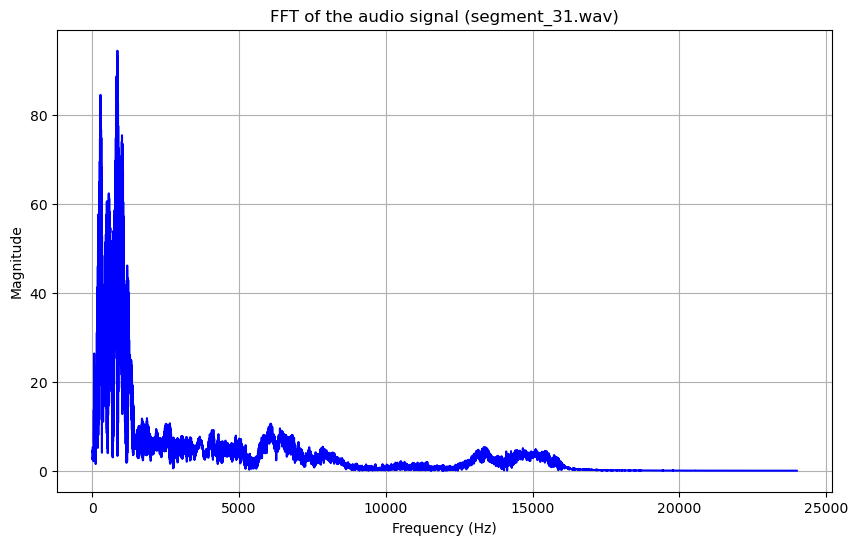

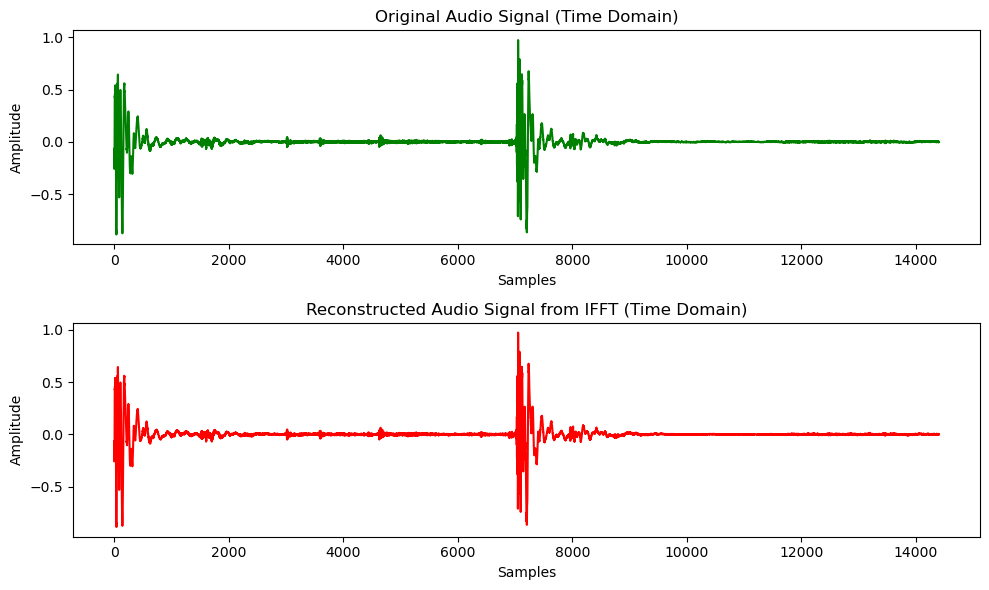

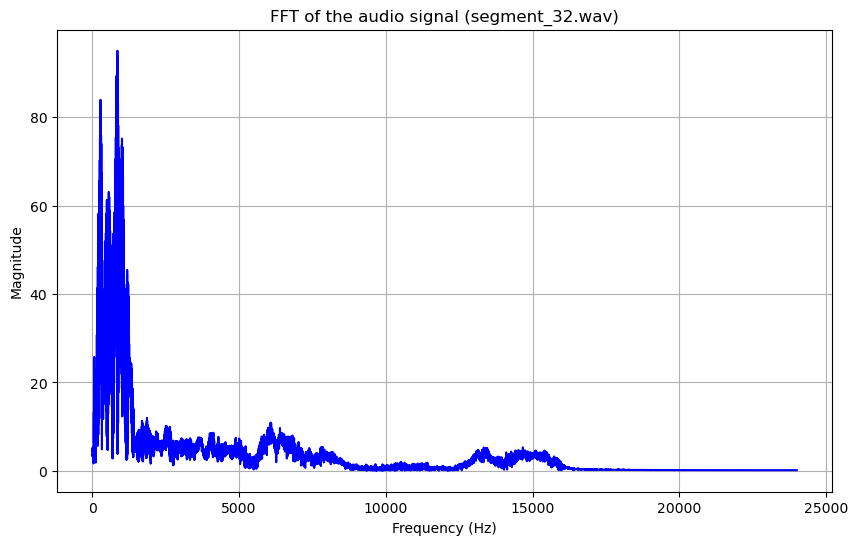

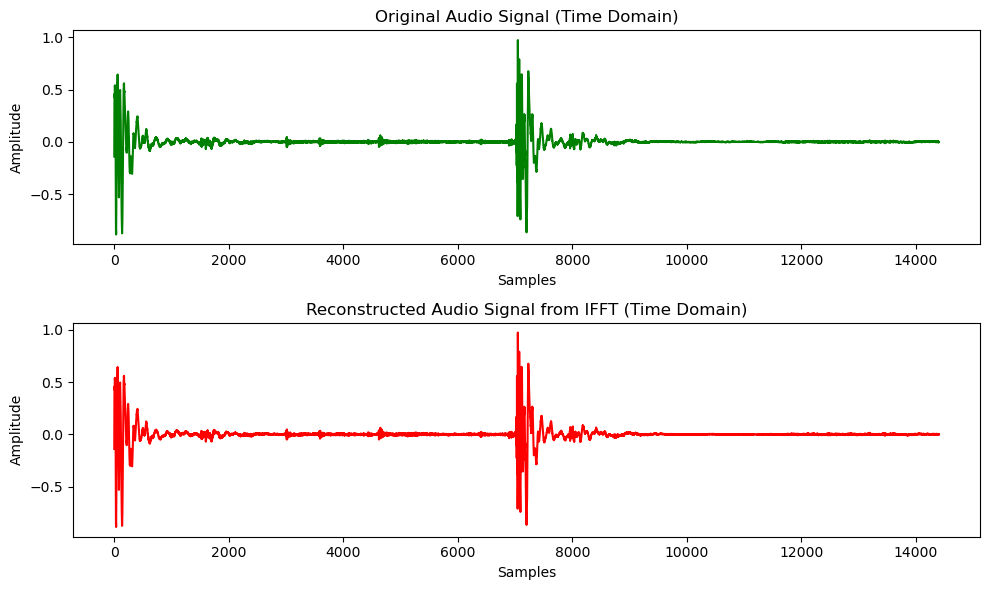

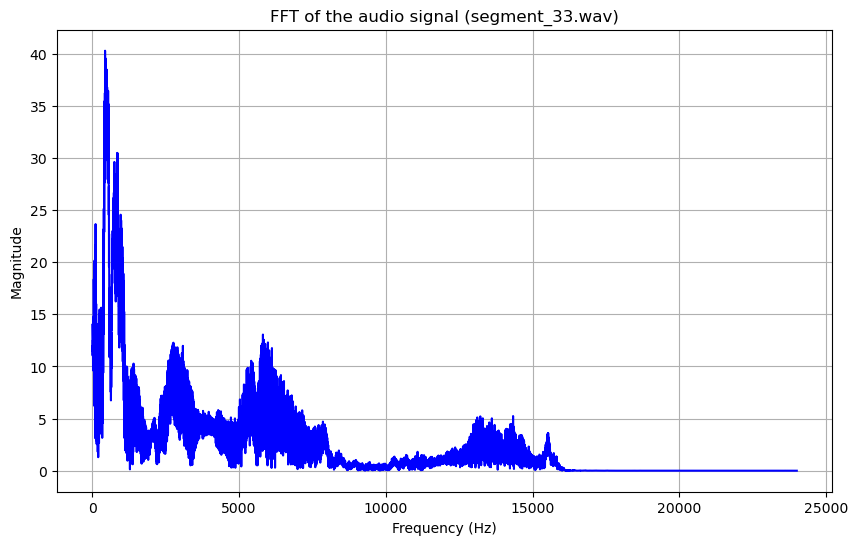

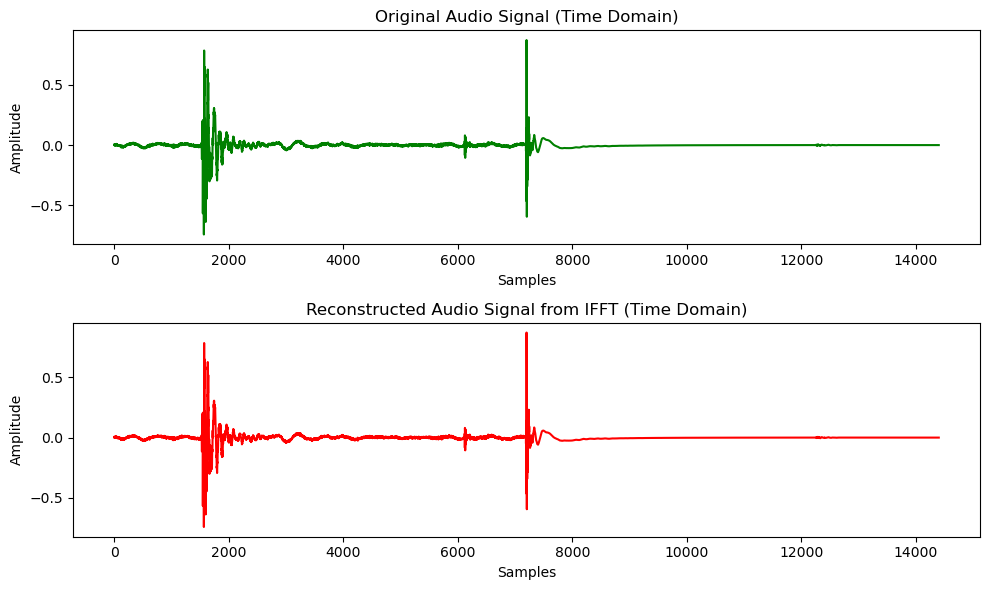

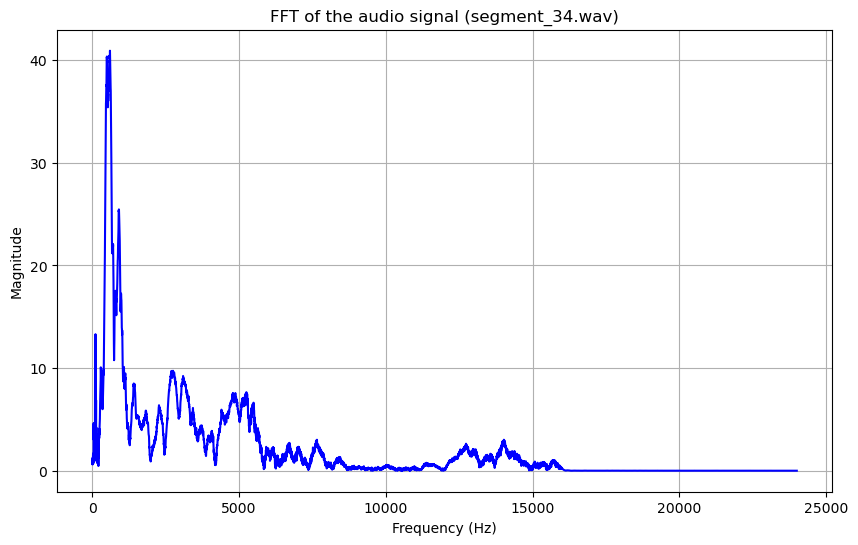

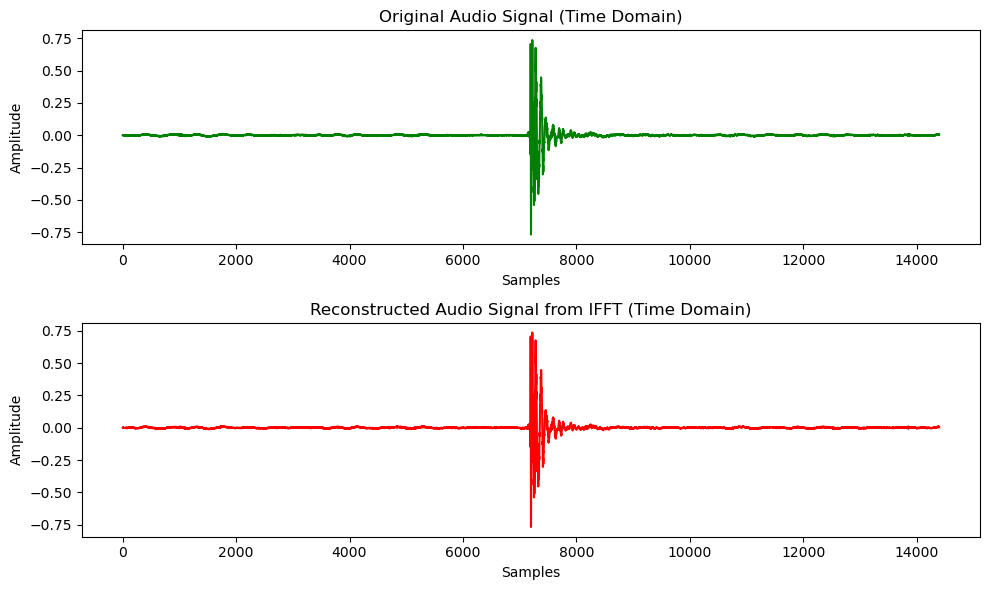

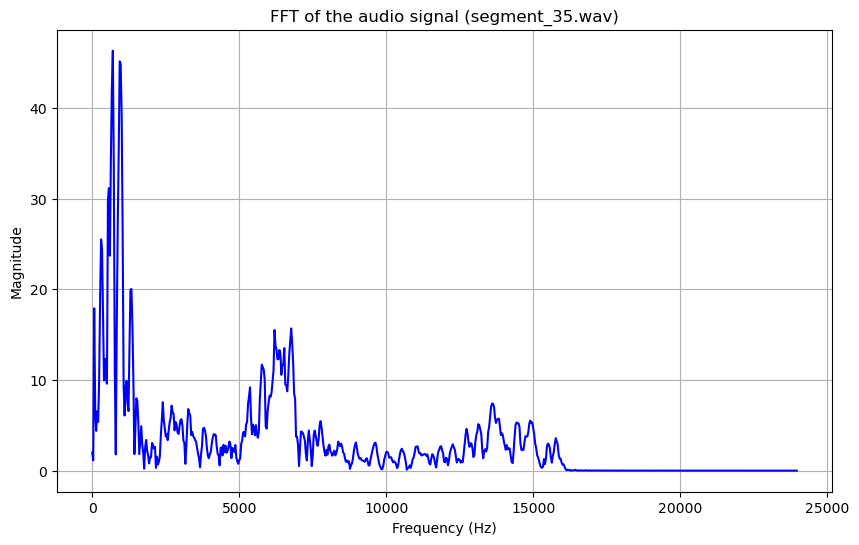

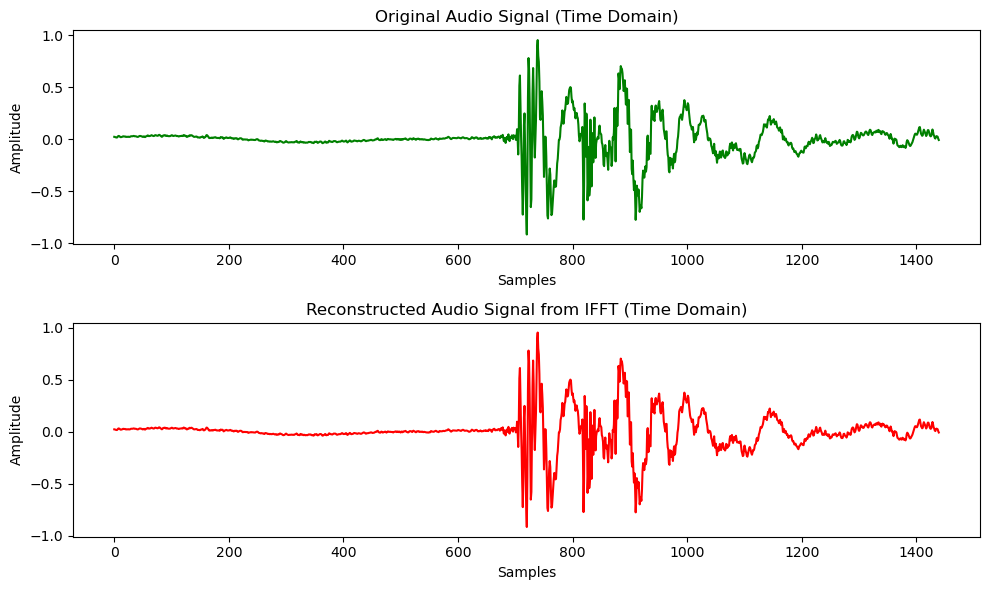

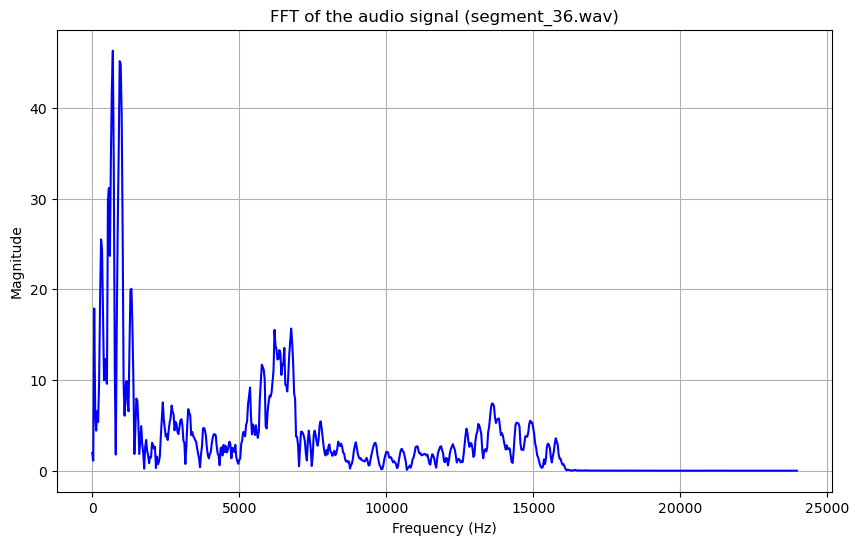

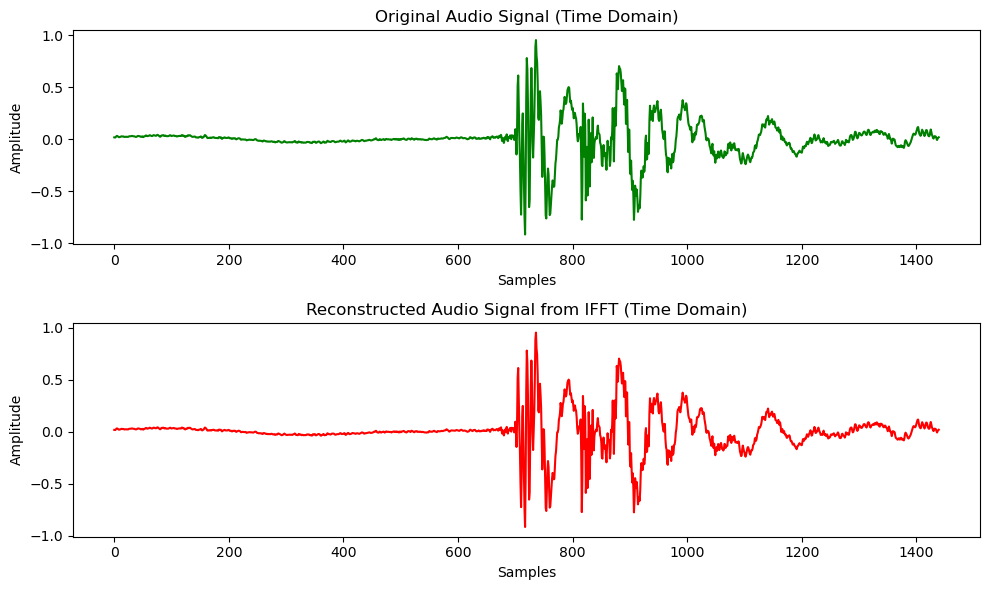

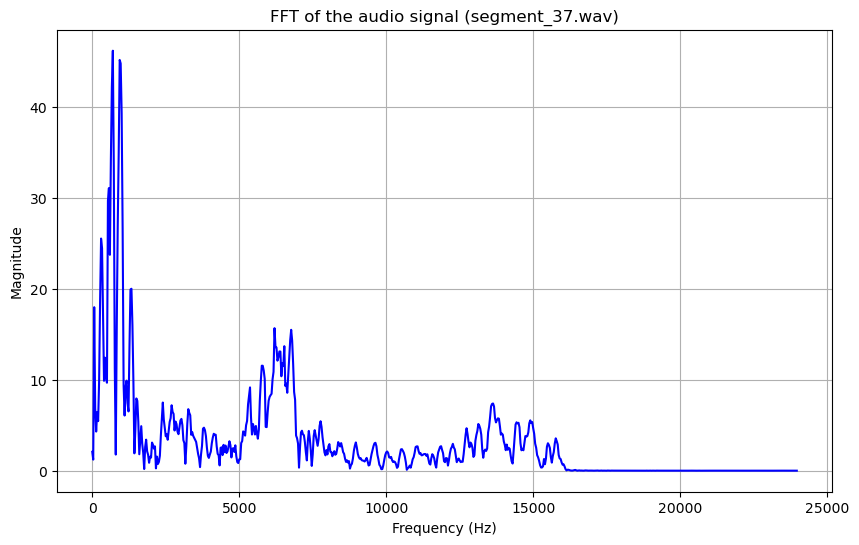

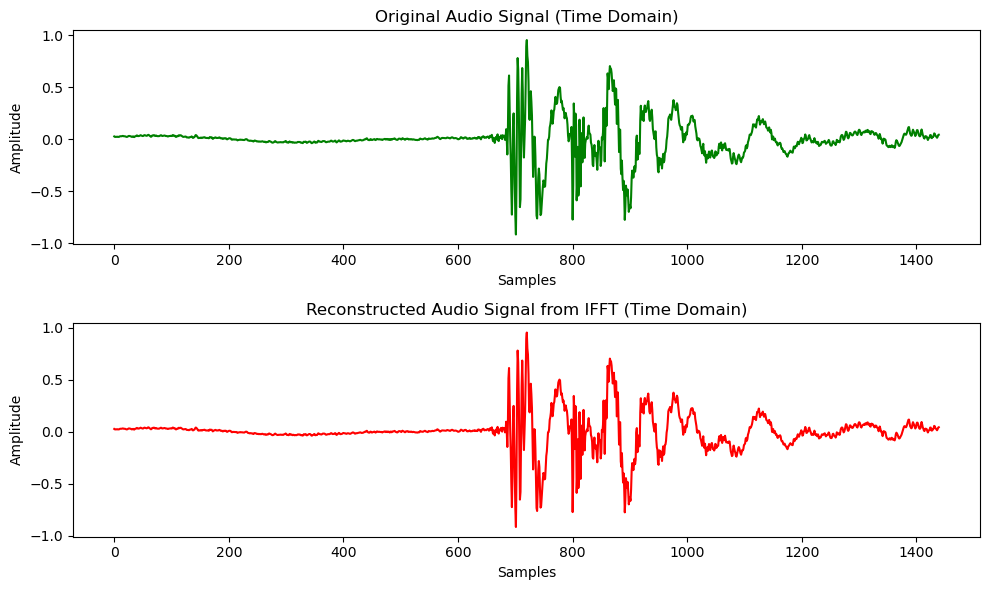

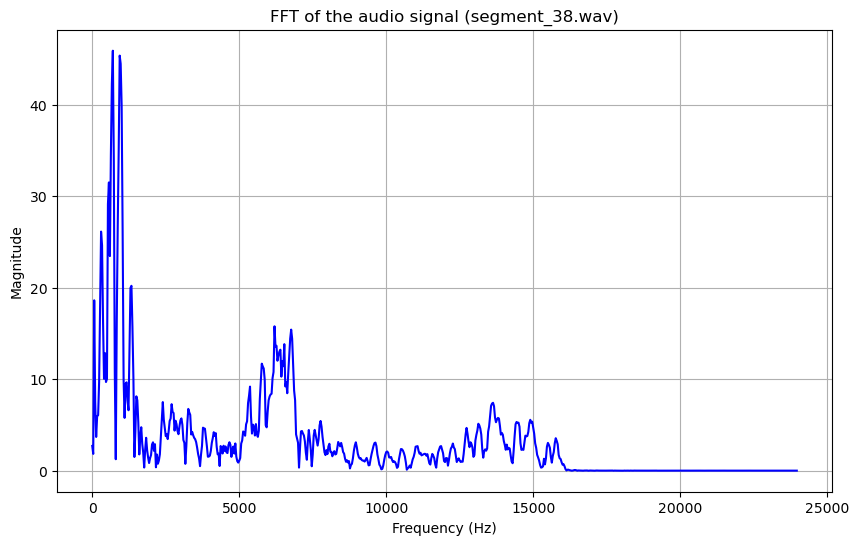

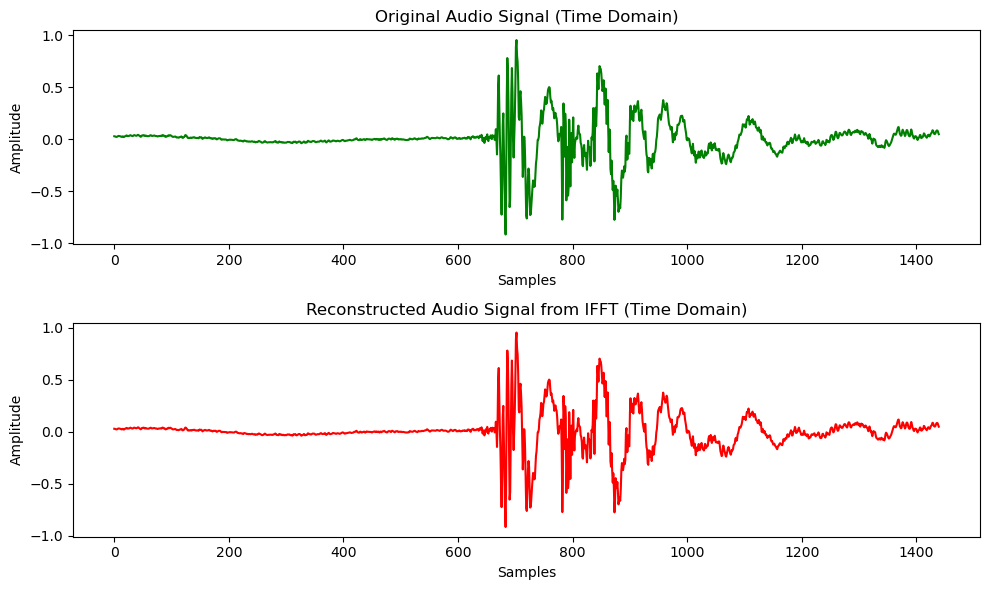

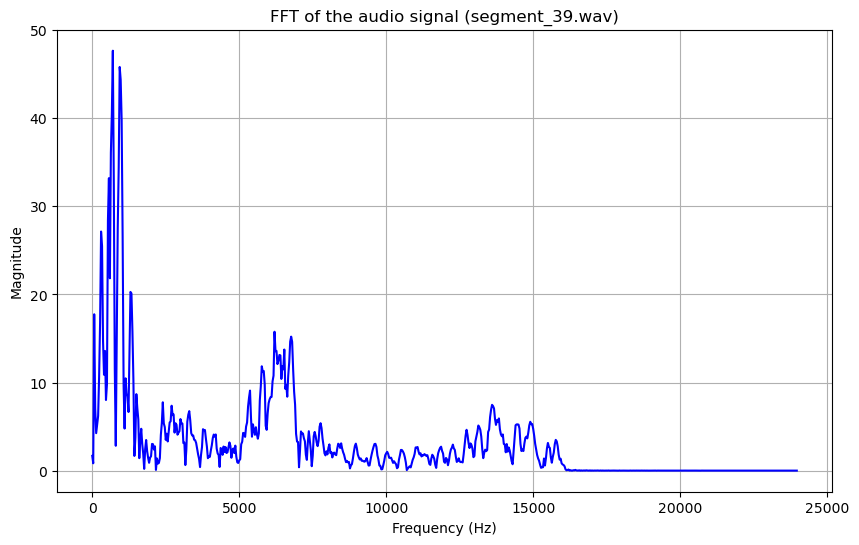

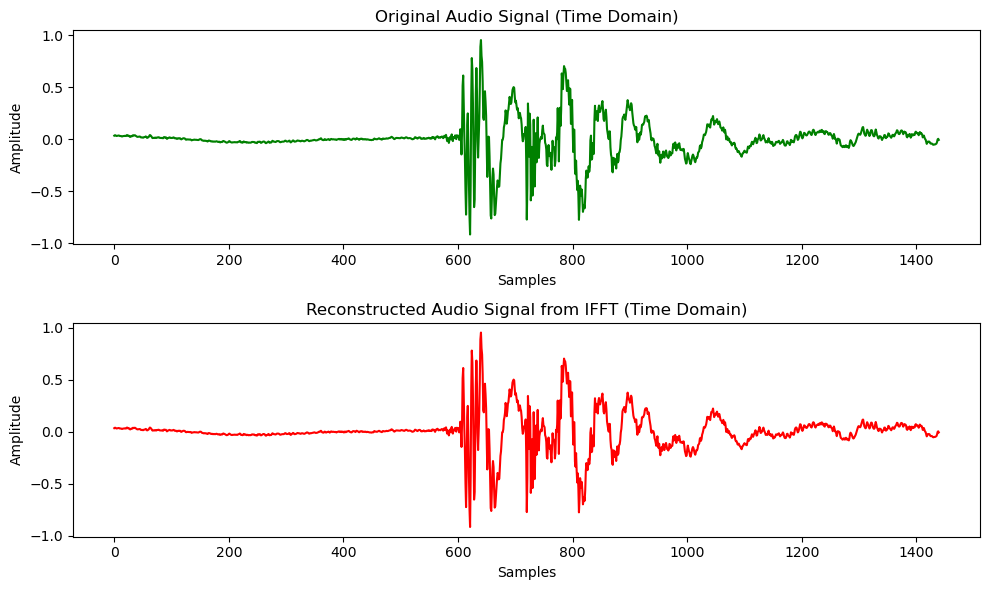

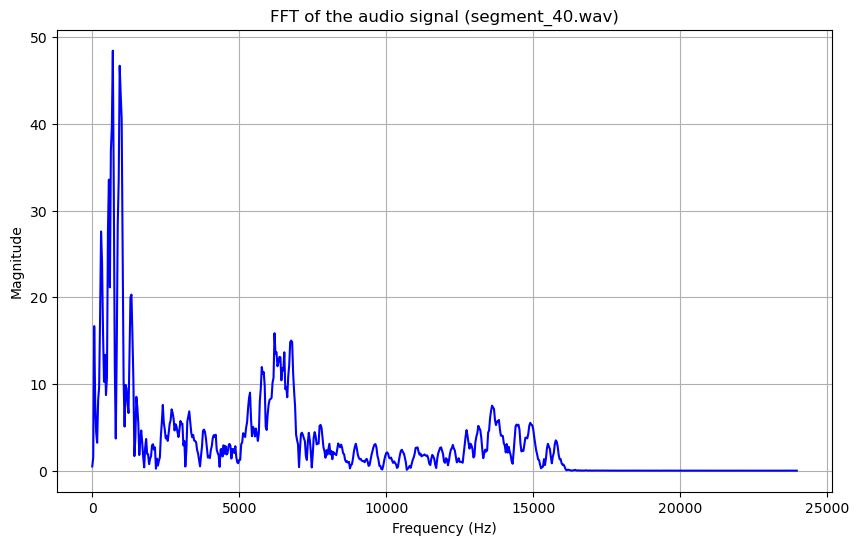

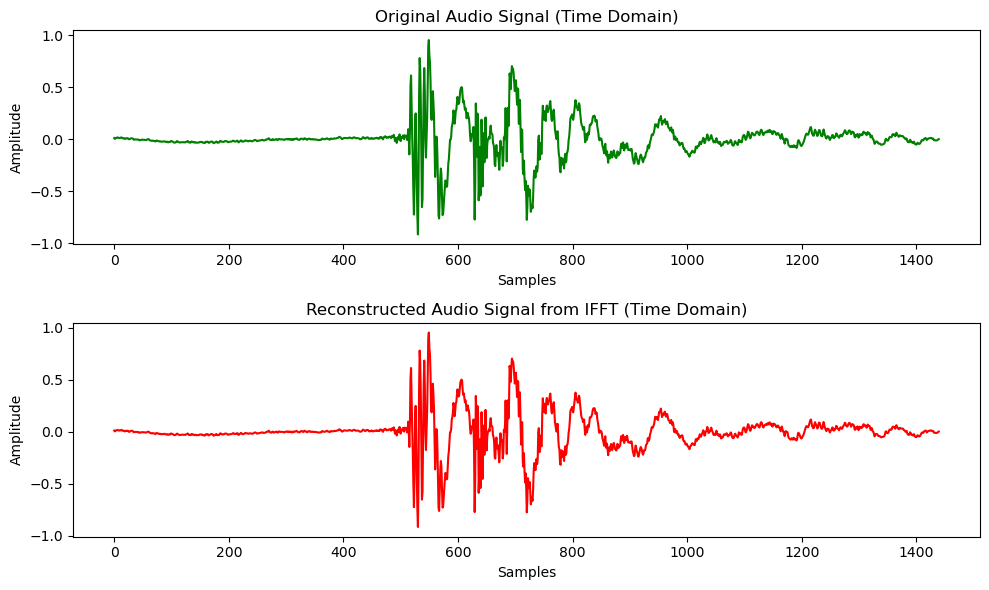

In [30]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def plot_fft_and_ifft(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate

    # Perform FFT on the signal
    n = len(y)  # Number of samples in the signal
    fft_values = np.fft.fft(y)  # Compute the FFT
    fft_magnitude = np.abs(fft_values)  # Magnitude of the FFT

    # Create frequency bins
    freqs = np.fft.fftfreq(n, 1/sr)

    # Only keep the positive half of the spectrum
    positive_freqs = freqs[:n // 2]
    positive_magnitude = fft_magnitude[:n // 2]

    # Plot the frequency spectrum (FFT)
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_magnitude, color='b')
    plt.title(f'FFT of the audio signal ({audio_file})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

    # Perform IFFT to reconstruct the original signal
    reconstructed_signal = np.fft.ifft(fft_values)

    # Plot the original and reconstructed signals for comparison
    plt.figure(figsize=(10, 6))

    # Plot original signal
    plt.subplot(2, 1, 1)
    plt.plot(y, color='g')
    plt.title('Original Audio Signal (Time Domain)')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')

    # Plot reconstructed signal (IFFT)
    plt.subplot(2, 1, 2)
    plt.plot(np.real(reconstructed_signal), color='r')
    plt.title('Reconstructed Audio Signal from IFFT (Time Domain)')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Loop through the segments and plot FFT and IFFT
for i in range(1, 41):  # Assuming you want to process 40 segments (1 to 40)
    audio_file = f'segment_{i}.wav'
    
    try:
        plot_fft_and_ifft(audio_file)  # Try to plot FFT and IFFT for the segment
    except FileNotFoundError:
        print(f"{audio_file} not found.")


In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def plot_fft(audio_file):
    # Load the .m4a audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate

    # Perform FFT on the signal
    n = len(y)  # Number of samples in the signal
    fft_values = np.fft.fft(y)  # Compute the FFT
    fft_magnitude = np.abs(fft_values)  # Magnitude of the FFT

    # Create frequency bins
    freqs = np.fft.fftfreq(n, 1/sr)

    # Only keep the positive half of the spectrum
    positive_freqs = freqs[:n // 2]
    positive_magnitude = fft_magnitude[:n // 2]

    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_magnitude, color='b')
    plt.title(f'FFT of the audio signal ({audio_file})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Loop through the segments and plot FFT
for i in range(1, 41):  # Assuming you want to process 40 segments (1 to 40)
    audio_file = f'segment_{i}.wav'
    
    try:
        plot_fft(audio_file)  # Try to plot FFT for the segment
    except FileNotFoundError:
        print(f"{audio_file} not found.")


In [2]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Directory containing the unripe audio segments
input_folder = 'Test'


def plot_fft(audio_file, output_folder, segment_number, additional_identifier):
    # Load the .wav audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate

    # Perform FFT on the signal
    n = len(y)  # Number of samples in the signal
    fft_values = np.fft.fft(y)  # Compute the FFT
    fft_magnitude = np.abs(fft_values)  # Magnitude of the FFT

    # Create frequency bins
    freqs = np.fft.fftfreq(n, 1/sr)

    # Only keep the positive half of the spectrum
    positive_freqs = freqs[:n // 2]
    positive_magnitude = fft_magnitude[:n // 2]

    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_magnitude, color='b')
    plt.title(f'FFT of the audio signal (Segment {segment_number}, ID {additional_identifier})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

    # Save the plot as an image in the output folder
    output_path = os.path.join(output_folder, f'fft_segment_{segment_number}_{additional_identifier}.png')
    plt.savefig(output_path)
    plt.close()  # Close the figure to avoid showing it during execution

# Ensure output directory exists
output_folder = 'Test_FFT_Output'
os.makedirs(output_folder, exist_ok=True)

# Loop through the segments in the unripe folder and plot FFT
for filename in os.listdir(input_folder):
    if filename.endswith('.wav') and 'segment_' in filename:
        # Extract the segment number and additional identifier from the filename
        try:
            # Split the filename to extract segment number and additional identifier
            parts = filename.split('_')
            segment_number = parts[1]
            additional_identifier = parts[2].split('.')[0]
            
            audio_file = os.path.join(input_folder, filename)
            
            # Plot FFT and save the image
            plot_fft(audio_file, output_folder, segment_number, additional_identifier)
            print(f'FFT plot saved for {audio_file} (Segment {segment_number}, ID {additional_identifier}).')
        except (IndexError, FileNotFoundError) as e:
            print(f"Error processing {filename}: {e}")


In [21]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Directory containing the unripe audio segments
input_folder = 'Midripe'
output_folder = 'MidRipe_Spectrograms'

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Loop through all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.wav') and 'segment_' in filename:
        try:
            # Get the full path of the audio file
            audio_file = os.path.join(input_folder, filename)

            # Load the .wav file
            y, sr = librosa.load(audio_file)

            # Compute the STFT
            stft_values = librosa.stft(y, n_fft=1024, hop_length=512)
            stft_magnitude = np.abs(stft_values)

            # Convert magnitude to decibel scale
            log_stft = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

            # Plot the spectrogram
            plt.figure(figsize=(10, 6))
            librosa.display.specshow(log_stft, sr=sr, cmap='magma')
            plt.tight_layout()

            # Save the plot
            output_file = os.path.join(output_folder, f'spectrogram_{filename}.png')
            plt.savefig(output_file)
            plt.close()  # Close the plot to free up memory
            print(f"Spectrogram saved: {output_file}")

        except FileNotFoundError:
            print(f"File {filename} not found.")
        except Exception as e:
            print(f"An error occurred for {filename}: {e}")


Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_1.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_10.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_11.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_12.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_2.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_3.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_4.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_5.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_6.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_7.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_8.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_10_9.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_1_1.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogr

Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_7_8.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_7_9.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_1.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_10.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_11.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_12.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_13.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_14.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_15.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_16.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_17.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_18.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_segment_8_19.wav.png
Spectrogram saved: MidRipe_Spectrograms\spectrogram_se

In [23]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Directory containing the unripe audio segments
input_folder = 'Test'
output_folder = 'Test_Spectrograms'

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Loop through all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.wav') and 'segment_' in filename:
        try:
            # Get the full path of the audio file
            audio_file = os.path.join(input_folder, filename)

            # Load the .wav file
            y, sr = librosa.load(audio_file)

            # Compute the STFT
            stft_values = librosa.stft(y, n_fft=1024, hop_length=512)
            stft_magnitude = np.abs(stft_values)

            # Convert magnitude to decibel scale
            log_stft = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

            # Plot the spectrogram
            plt.figure(figsize=(10, 6))
            librosa.display.specshow(log_stft, sr=sr, cmap='magma')
            plt.tight_layout()

            # Save the plot
            output_file = os.path.join(output_folder, f'spectrogram_{filename}.png')
            plt.savefig(output_file)
            plt.close()  # Close the plot to free up memory
            print(f"Spectrogram saved: {output_file}")

        except FileNotFoundError:
            print(f"File {filename} not found.")
        except Exception as e:
            print(f"An error occurred for {filename}: {e}")


In [ ]:
y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate

    # Perform FFT on the signal
    n = len(y)  # Number of samples in the signal
    fft_values = np.fft.fft(y)  # Compute the FFT
    fft_magnitude = np.abs(fft_values)  # Magnitude of the FFT

    # Create frequency bins
    freqs = np.fft.fftfreq(n, 1/sr)

    # Only keep the positive half of the spectrum
    positive_freqs = freqs[:n // 2]
    positive_magnitude = fft_magnitude[:n // 2]

    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_magnitude, color='b')
    plt.title(f'FFT of the audio signal ({audio_file})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()
`

In [34]:
audio_file = "segment_1.wav"

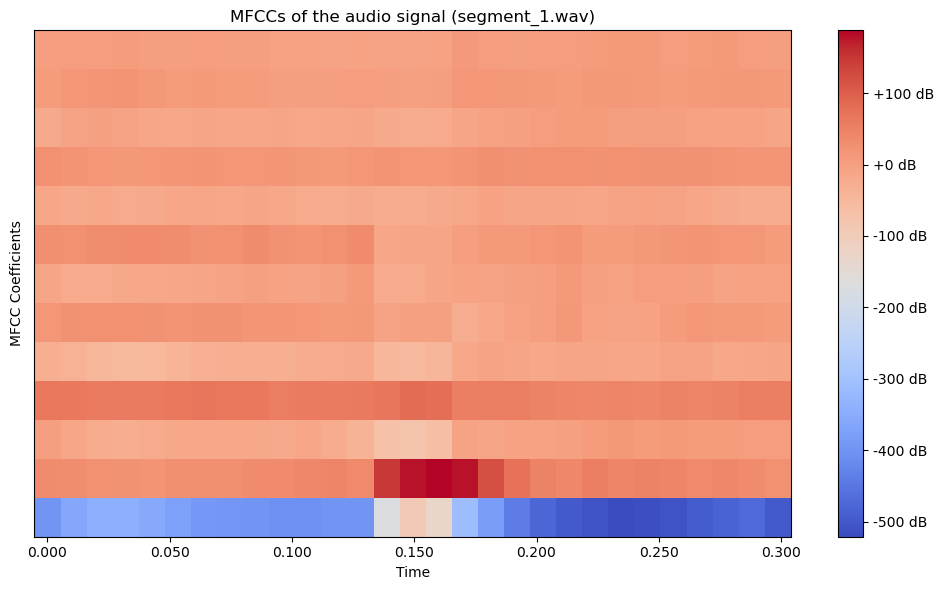

In [35]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load(audio_file, sr=None)  # Load audio with the original sample rate

# Compute the MFCCs
n_mfcc = 13  # Number of MFCCs to extract (typically 13)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Plot the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title(f'MFCCs of the audio signal ({audio_file})')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()
